<font size="6">**Pre-elaborazione di grandi serie temporali finanziarie**</font><br>

> (c) 2025 Antonio Piemontese

# Determinazione dell'ambiente di esecuzione.
Il notebook funziona **indifferentemente** sia su Jupyter Notebook che su Google Colab, come detto, <u>a parte due aspetti</u>:
- il caricamento dei dataset nel notebook
- l'inclusione delle immagini *png* nelle singole celle
E' quindi utile **determinare l'ambiente di esecuzione**, impostando una variabile binaria (a `True` se siamo in Google Colab, a `False` se siamo in Jupyter Notebook.

Le due operazioni suddette saranno eseguite in modo differente a seconda del valore della variabile binaria.

---
<p style="color:red; font-size:18px; font-weight:bold;">
🚨 Il presente notebook è riutilizzabile al 99% con il vostro dataset finanziario. 🚨
</p>

---

In [ ]:
# impostazione del TOGGLE BINARIO:
try:
    import google.colab                      # package disponibile SOLO in Google Colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print("Running on Colab:", IN_COLAB)


# IMPORT dei package necessari (necessari sia in JN che in Colab):
from IPython.display import Image, display   # import dei package di incorporamento e visualizzazione immagine (una tantum)
                                             # Image e display sono entrambi necessari a Jupyter Notebook
                                             # Google Colab utilizza solo Image
import os                                    # necessario a Google Colab per vedere da una cella codice
                                             # i contenuti del 'content'

Running on Colab: True


# Caricamento immagini
- `boxplot.png`
- `EDA.png`
- `pandas_data_types.png`
- `pandas_with_GPU.png`
- `polars2.png`
- `programma_aula_mediolanum_TS.png`
- `recap_TS_chatGPT5.png`
- `Series_vs_Dataframe.png`
- `tabella_formati_TS.png`
- `time_series.png`
- `trades_vs_OHLCV.png`
- `variabili_endogene_esogene.png`
- `variables_types.png`


**DOVE devono TROVARSI le immagini**? (per essere visualizzate dalle varie celle)

Con ***Jupyter Notebook*** devono trovarsi nella **stessa cartella del notebook** (il path è infatti relativo).<br>
Con ***Google Colab*** devono essere **caricate nella directory *content* dello storage volatile della sessione**, in questo modo:
- fare click sull'icona *Files* al fondo del menù laterale di sinistra (di Google Colab); per default, è mostrata la directory *content* della *session storage*, che è costituita da una serie di cartella (non solo *content*)
- fare click sull'icona *Upload to session storage* (non confondere con il bottone di *Upload* di Gemini) e quindi caricare l'immagine
- possono occorrere alcuni secondi prima che l'immagine risulti elencata (vedi la rotella di avanzamento caricamento a fondo finestra)
- verificare l'effettiva disponibilità dell'immagine nella *session storage* (in Google Colab) nel seguente modo:

In [ ]:
# comando solo per Google Colab
if IN_COLAB:
    print(os.listdir('/content'))      # la print è necessaria, altrimenti NON visualizza nulla.
                                       # la funzione 'os.listdir()' infatti restituisce una lista, che poi occorre
                                       # assegnare ad una variabile o passare ad una funzione!

['.config', 'stocks_3titoli_2020_2024.csv', 'sample_data']


Il **piano generale** del corso (sulle 4 giornate):

In [ ]:
Image('programma_aula_mediolanum_TS.png') if IN_COLAB else display(Image(filename='programma_aula_mediolanum_TS.png'))

FileNotFoundError: No such file or directory: 'programma_aula_mediolanum_TS.png'

FileNotFoundError: No such file or directory: 'programma_aula_mediolanum_TS.png'

<IPython.core.display.Image object>

---

# Il programma di oggi (prima giornata)
La **pre-elaborazione** dei dati nella ***big time series*** (di decine di milioni di elementi) in ambito **finanziario**:
- package Python da utilizzare
- estrazione della serie
- pulizia della serie
- statistiche di distribuzione
- normalizzazione dei dati
- gestione dei valori mancanti, anche detti *MV=Missing Values* (varie strategie)
- gestione degli *outlier* (varie strategie)
- esempi pratici in Python

---


---
<span style="background-color:yellow; font-weight:bold;">📌 Il presente notebook funziona sia in **Jupyter Notebook che in Google Colab**. Scegliete l'ambiente più adatto per voi, per evitare di dover studiare due ambienti.</span>

---

---

**Legenda delle icone (standard) usate nel notebook**:<br>
👉 punto di attenzione, il "succo"<br>
📌 nota<br>
📦 punto elenco importante<br>
📊 dati/numeri<br>
🔹 punto elenco normale<br>
⭐ punto elenco importante<br>
✅ punto risolto, positivo<br>
❌ punto negativo, da evitare<br>
⚠️ attenzione, warning, allarme

---

# Le serie temporali (*time series*)

Anche dette **serie storiche**.

## Definizioni di serie temporale

Cosa sono?<br>

Wikipedia dà la seguente definizione alla [sua voce "serie storica"](https://it.wikipedia.org/wiki/Serie_storica):

> *In statistica descrittiva, una serie storica (o temporale) si definisce come un insieme di osservazioni ordinate rispetto al tempo, ed esprime la dinamica di un certo fenomeno nel tempo. Le serie storiche vengono studiate sia per interpretare un fenomeno, individuando componenti di trend, di ciclicità, di stagionalità e/o di accidentalità, sia per prevedere il suo andamento futuro.*

[Galit Shmueli](https://en.wikipedia.org/wiki/Galit_Shmueli), una professoressa israeliana che insegna a Taiwan ed una delle massime esperti di analisi delle serie temporali, nè da questa definizione:

> *Una serie temporale (o storica) è una sequenza di misurazioni di una variabile (spesso numerica) nel tempo, nella quale il tempo è un fattore chiave.*

Esempi di serie temporali
- dati azionari (*stocks data*) al livello di ticker
- acquisti on-line ad un sito e-commerce

La definizione di **chatGPT5**:

📖 Definizione semplice
- Una **serie temporale** è una <u>sequenza di osservazioni</u> di una variabile (**quantitativa o qualitativa**) <u>ordinate nel tempo</u>.
- La dimensione fondamentale è il **tempo**: ogni valore è associato a un’unità temporale (giorno, ora, minuto, anno…).
- Ciò che conta non è solo il valore, ma **l’ordine cronologico** in cui i dati si presentano.

🔹 Esempi
- Temperature giornaliere in una città.
- Prezzo di chiusura di un’azione ogni giorno.
- Ore di sonno registrate da un paziente ogni notte.
- Numero di passeggeri che salgono su un treno ogni mese.

🧩 Caratteristiche chiave
- **Indice temporale (t)**: i dati sono raccolti a intervalli regolari (serie regolare) o irregolari (serie irregolare).
- **Dipendenza temporale**: il valore di oggi è spesso legato ai valori di ieri o del passato.
- **Componenti tipiche**:
    - *Trend*: crescita o calo di lungo periodo.
    - *Stagionalità*: cicli regolari (giornalieri, settimanali, annuali).
    - *Cicli*: oscillazioni non regolari legate a fenomeni economici/sociali.
    - *Rumore*: variazione casuale, non spiegata.

🔹 In matematica:<br>
Una serie temporale è una funzione: $X(t)$, con $t=1,2,3,...$<br>
dove:<br>
- $𝑋(𝑡)$ è il valore osservato al tempo $𝑡$.

# Gestione delle serie storiche

**Due tipi** di "gestione" delle serie storiche:
* **Analisi** delle serie temporali (o storiche), riferita al <u>passato</u> (detta spesso **TSA** = Time Series Analysis), anche sino a ieri
* **Forecasting**, riferito al <u>futuro</u> (detta spesso **TSF** = Time Series Forecasting), da domani in poi (per un determinato **orizzonte temporale** di previsisone).

TSA individua **trend, relazioni, pattern stagionali e fattori esterni (driver)** della serie storica.
Il forecasting (TSF) invece prevede i **valori FUTURI** della serie storica. [nb. Forecasting <> Prediction].

# Le time series finanziarie

📖 **Definizione in ambito finanziario** (chatGPT5)

**In finanza**, una serie temporale è una sequenza ordinata nel tempo di osservazioni relative a **una variabile di mercato o economica**.

👉 La variabile può essere:
- **Prezzi**: prezzo di chiusura giornaliero di un titolo (close), prezzo intraday (tick, minuto, ora).
- **Rendimenti**: log-return o percentuale di variazione giornaliera.
- **Volumi**: quantità di azioni scambiate.
- **Indicatori**: volatilità, spread bid-ask, indici di mercato, tassi di interesse, ecc.

🔹 Esempi tipici:
- **Serie giornaliera**: prezzo di chiusura di AAPL (il ticker di Apple) dal 2010 al 2025.
- **Serie ad alta frequenza**: flusso di transazioni (**tick data**) o book ordini.
- **Serie multivariate**: più titoli o più variabili (es. prezzi e volumi di ENI, ENEL, INTESA, …).

🧩 Perché è importante in finanza?
- Le serie temporali sono la **base per la modellazione**: ARIMA, GARCH, VAR, modelli di volatilità, reti neurali, ecc.
- Servono per il **forecasting** (prevedere prezzi, rendimenti, volatilità **FUTURI**).
- Permettono analisi come:
    - volatilità storica,
    - correlazioni cross-asset,
    - risk management (VaR, stress test),
    - trading system (pattern detection, modelli predittivi).

🔹 Differenza rispetto a una tabella “normale”
- In una serie temporale finanziaria, **i dati non sono indipendenti**:
- Il prezzo di oggi dipende dal prezzo di ieri (persistenza, autocorrelazione).
- Ci sono effetti specifici:
    - “day of the week effect”
    - clustering della volatilità
    - cicli intraday (alta attività all’apertura/chiusura del mercato).

👉 **In sintesi**:<br>
> **Una serie temporale finanziaria è la sequenza cronologica di osservazioni di variabili di mercato (prezzi, rendimenti, volumi, indici), usata per analizzare e modellare il comportamento dei mercati finanziari.**

**Esempi** di time series finanziarie:

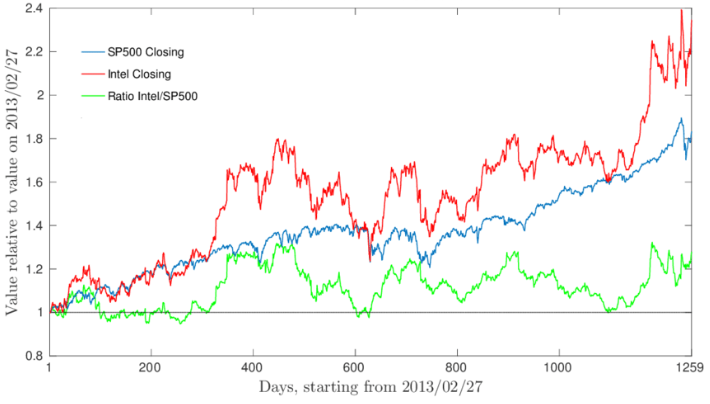

In [ ]:
Image('time_series.png') if IN_COLAB else display(Image(filename='time_series.png'))

**Trades vs OHLCV**:<br>

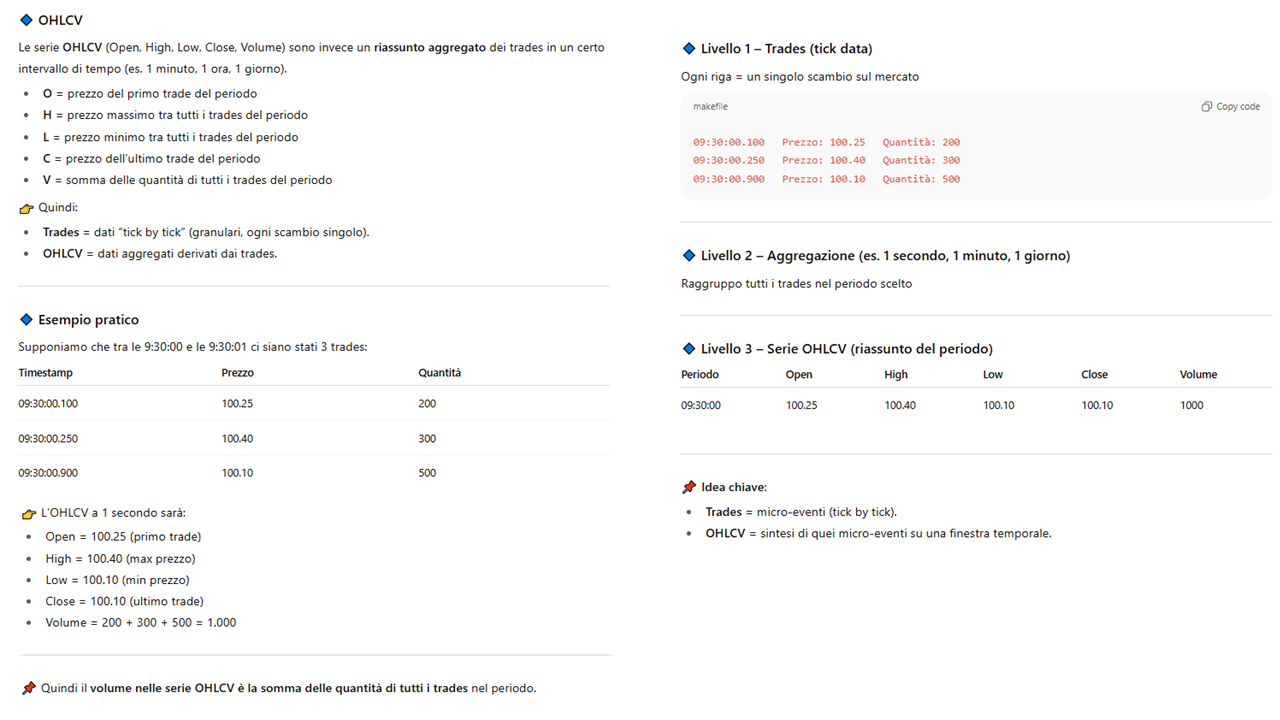

In [ ]:
Image('trades_vs_OHLCV.png') if IN_COLAB else display(Image(filename='trades_vs_OHLCV.png'))

## Tipi di serie
- **Univariate**: anche dette **serie singole**: una sola variabile nel tempo (es. il prezzo di chiusura del titolo ENI alla Borsa di Milano nel 2024).
- **Multivariate**: anche dette **serie multiple**: più variabili osservate insieme (es. prezzo + volume di ENI; oppure prezzi di più titoli).

In questo corso tratteremo serie singole e multi-variate. Per semplicità statistica, queste ultime le dovremo in alcuni casi considerare composte da serie storiche **indipendenti**, anche se spesso non è così.

## Tipi di variabili

Le variabili **esogene** in una serie temporale sono variabili **esterne al processo che stai modellando**, ma che possono avere **un’influenza su di esso**.

💡 Facciamo qualche distinzione:

Una serie temporale **endogena** (o “dipendente”) è quella che stai cercando di modellare o prevedere.<br>
👉 Esempio: il prezzo giornaliero di un titolo azionario.

Le variabili esogene sono invece variabili <u>esterne</u>, che **non fanno parte della dinamica intrinseca** della serie ma che potrebbero **spiegarne parte della variazione**.<br>
👉 Esempio: i tassi d’interesse o il tasso di cambio EUR/USD possono influenzare il prezzo di quel titolo.


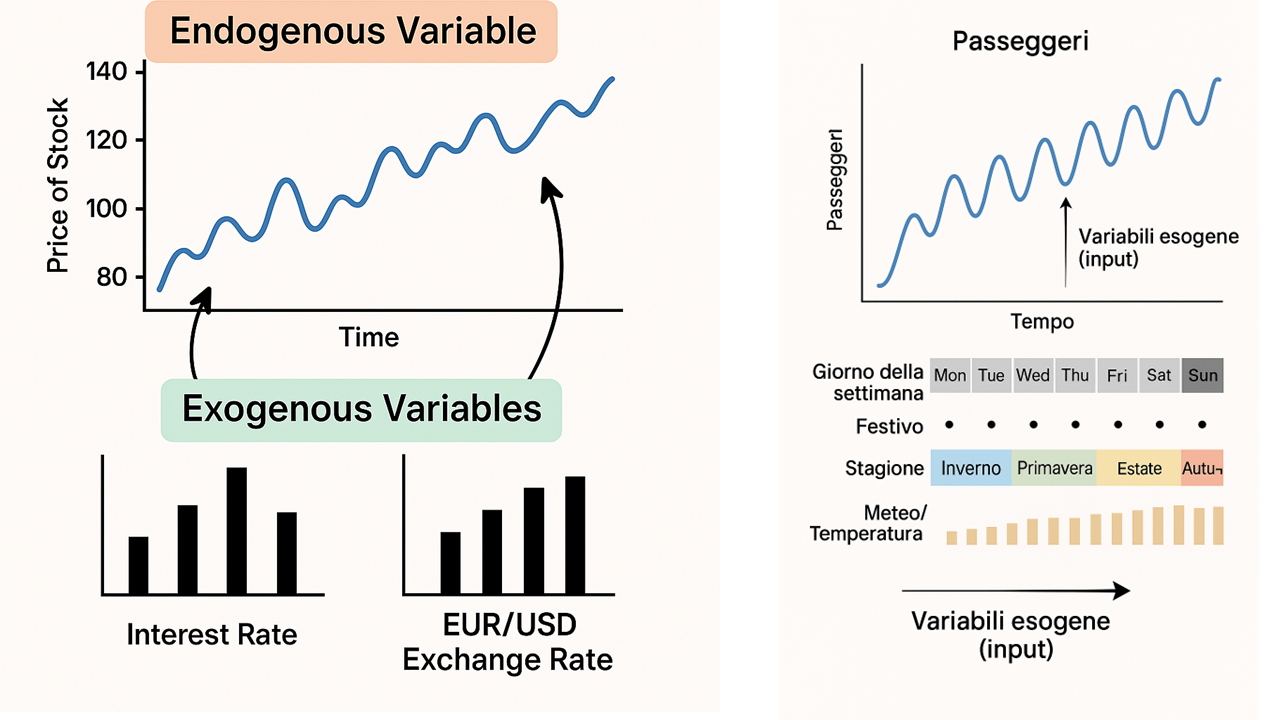

In [ ]:
Image('variabili_endogene_esogene.png') if IN_COLAB else display(Image(filename='variabili_endogene_esogene.png'))

## Recap grafico

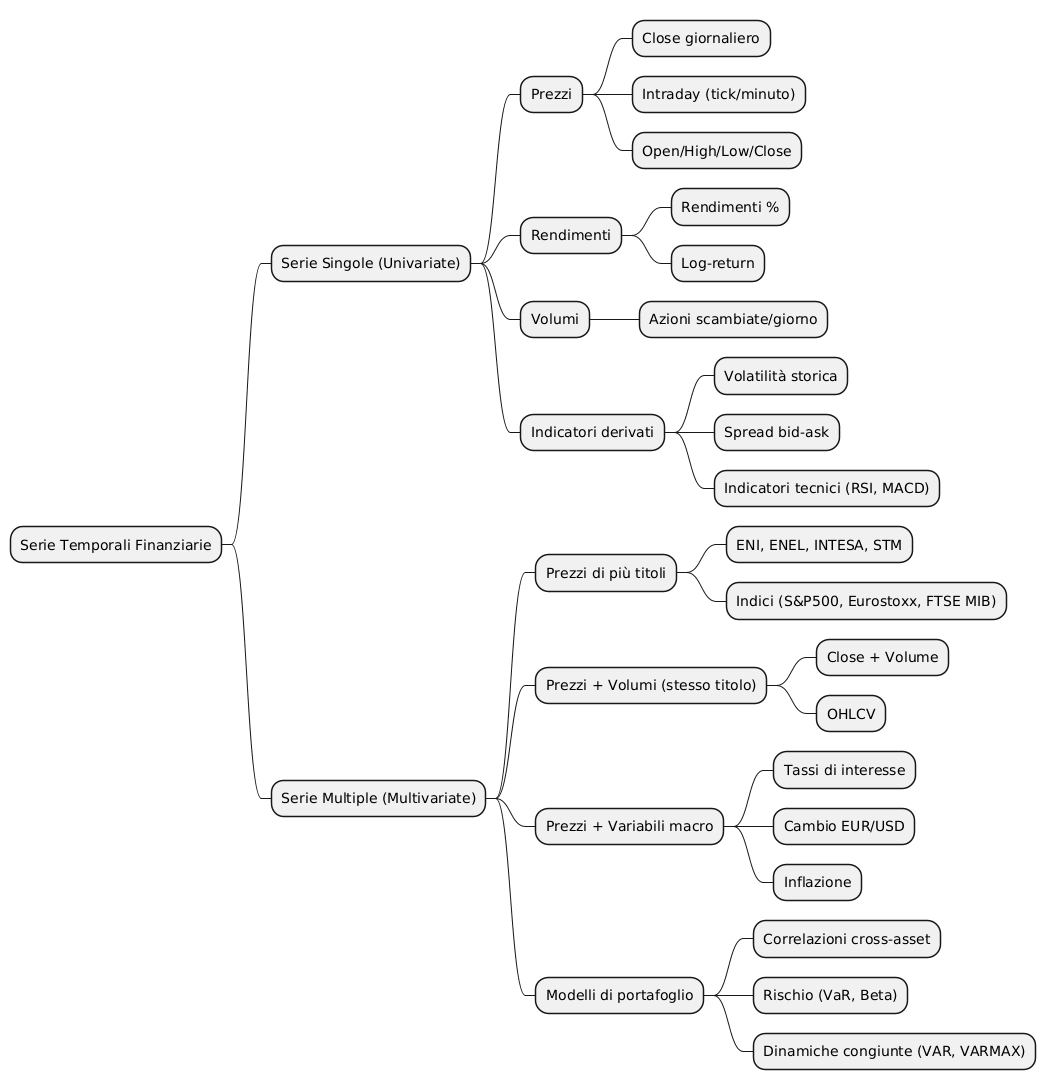

In [ ]:
Image('recap_TS_chatGPT5.png') if IN_COLAB else display(Image(filename='recap_TS_chatGPT5.png'))

⚠️ **Disclaimer**:<br>
Useremo time series **OHLCV** (prezzi azionari), **indici**, ***trades*** (ordini di scambio) e time series **simulate**. E' molto difficile trovare big time series di altro tipo pubblicate (ad esempio transazioni clienti o tick data).

# Le time series del notebook

👉 **Procederemo a passi: dal piccolo al grande.**

In questo notebook utilizzeremo **3 time series finanziarie**:
- serie storica dei prezzi azionari OHLCAV (ed altro) di **Alpha Vantage** - circa **1300** elementi
- serie storica `NYSE` (andamenti della borsa di New York dal 1962 al 1986) - circa **6000** elementi con suddivisone **train/test** per il **TSF**
- serie storica `usa_stocks_30m.parquet`: la serie OHLCV di 514 titoli del Nasdaq del NYSE (dal 1998 al 2024): circa **30 milioni** di elementi.

Vedremo la **meccanica di base** della **TSA** applicata <u>ad una serie medico-comportamentale</u>.

---
👉 Le serie temporali ora esaminate sono di piccole  dimensioni. La CPU è sufficiente, inutile sprecare la GPU.

---

# Caricamento e breve analisi della serie *Alpha Vantage*

Un **dataset alternativo** a `USA 514 Stocks Prices NASDAQ NYSE`.

[**Alpha Vantage**](https://www.alphavantage.co/) è una azienda che **fornisce dati** in partnership con importanti borse ed istituzioni. Tramite la API di Alpha Vintage è possibile accedere alle:
* serie storiche dei prezzi azionari con differenze intervalli temporali (orari, giornalieri, settimanali, ecc)
* serie storiche dei tassi di cambio.
* ecc<br>

Alcune serie storiche fornite da Alpha Vantage sono <u>gratuite</u>; quelle *adjusted* sono invece <u>a pagamento</u>. Vedi [qui](https://www.alphavantage.co/documentation) per l'elenco delle serie storiche disponibili e documentate.<br>

In ogni caso, per accedere a qualsiasi serie storica di Alpha Vantage  , occorre avere una **API key** da inserire nel codice, fornita da Alpha Vantage.<br>

Una chiave gratuita della API di Alpha Vantage può essere ottenuta [qui](https://www.alphavantage.co/support/#support). Con essa si può accedere a molti *endpoint* (serie storiche), tra i quali ad esempio `TIME_SERIES_INTRADAY` oppure `TIME_SERIES_DAILY`.<br>



Per ottenere il prezzo di chiusura *adjusted* (giornaliero) occorre usare l'endpoint `TIME_SERIES_DAILY_ADJUSTED`:
> *This API returns raw (as-traded) daily open/high/low/close/volume values, adjusted close values, and historical split/dividend events of the global equity specified, covering 20+ years of historical data. The OHLCV data is sometimes called "candles" in finance literature.*

Come detto, le serie storiche *adjusted* fornite da Alpha Vantage sono a pagamento; per accedere alla serie storica `TIME_SERIES_DAILY_ADJUSTED` occorre dunque procurarsi una **chiave a pagamento** (circa 50$ al mese minimo), con la quale si può accedere a <u>tutte</u> le serie storiche di Alpha Vantage (a pagamento e gratuite). L'indirizzo per farlo è [questo](https://www.alphavantage.co/premium/) [premere sul bottone `GET PREMIUM API KEY`], esistono vari piani mensili.<br>

---
Le celle di codice successive utilizzano la chiave a pagamento `ZEL4EX930HVCTUWP`, acquistata il 21 settembre 2025 e <u>valida 1 mese, cioè sino al 21 ottobre 2025</u>.

<span style="background-color:yellow; font-weight:bold;">📌 Come <u>bonus del corso</u>, potete **utilizzare questa chiave liberamente per un mese per le VOSTRE prove**.</span>

---

Questa chiave consente sino a **75 chiamate al minuto** alla API di Alpha Vantage e fornisce i dati del **NYSE** in tempo reale, con 15 minuti di ritardo.<br>

Estraiamo dall'endopoint `TIME_SERIES_DAILY_ADJUSTED` di Alpha Vantage i dati di **IBM**, nel seguente modo:

In [ ]:
# per usare la API di Alpha Vantage:
import requests
from io import StringIO

In [ ]:
parameters = {'function': 'TIME_SERIES_DAILY_ADJUSTED',   # questo endpoint è a pagamento;
                                                          # l'endpoint TIME_SERIES_INTRADAY è invece gratuito, come molti altri

                       'symbol': 'IBM',                   # il titolo richiesto (IBM come esempio)
                       'outputsize':'full',               # da novembre 1991
                       'datatype': 'csv',                 # il formato richiesto (comma separated value)
                       'apikey': 'ZEL4EX930HVCTUWP'       # <--- inserire QUI la API key dell'endpoint: ZEL4EX930HVCTUWP
                       }
                                                          # precedente 25.1.24: T6X6OIMHO37KSK2
                                                          # precedente di dicembre 2023: ARJS8Y6X9T4VN47E
                                                          # nuova 21.9.25: ZEL4EX930HVCTUWP
                                                          # (la mia DHZWYMWLZIR3JKW0 gratuita)

url = 'https://www.alphavantage.co/query'                 # la URL alla quale chiedere i dati (un sito di Alpha Vantage)

r = requests.get(url,params=parameters)                   # la richiesta al sito (dati la url ed i parametri)
                                                          # --> 'r' è la risposta

csvText = StringIO(r.text)                                # questo comando apre la risposta testuale e la converte in un
                                                          # FILE STANDARD:

                                                          # --> 'r.text' è una 'str' python (una stringa alfanumerica);
                                                          # 'StringIO' è una funzione in-memory che crea un file standard;
                                                          # sono disponibili altri formati della risposta, ad esempio: r.json()



La precedente cella ha usato la funzione [**`StringIO`**](https://www.geeksforgeeks.org/stringio-module-in-python/).<br>
*The StringIO module is an **in-memory file-like object**. This object can be used as input or output to the most function that would **expect a standard file object**. When the StringIO object is created it is initialized by passing a string to the constructor. If no string is passed the StringIO will start empty. In both cases, the initial cursor on the file starts at zero.*

*NOTE: This module does not exist in the latest version of Python so to work with this module we have to import it from the io module in Python as **io.StringIO**.*

A questo punto ci serve il famoso package *pandas*:

In [ ]:
import pandas as pd

Due package python fondamentali per questo corso sono:
- **numpy** (np): abbreviazione di *NUMerical PYthon*, libreria per il calcolo numerico e scientifico; contiene molte funzioni matematiche di alto livello per l'algebra lineare (ad es. prodotti scalari tra vettore e matrice); contiene un generatore di numeri pseudo-casuali; permette di creare array multi-dimensionali con operazioni vettorizzate; nato nel 2006 dall'unione di due precedenti package numerici; si appoggia a veloci librerie C e Fortran ([BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms) e [LAPACK](https://en.wikipedia.org/wiki/LAPACK)); è considerato la versione Python di Matlab;
- **pandas** (pd): è una libreria per importare, gestire e manipolare i [**data frame**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) in vari formati (serie, dataframe, ecc); per visualizzare i dati in vari modi; per estrarre una parte dei dati, unire due dataset; contiene anche alcune funzioni statistiche di base; **è costruito sopra numpy**; i due oggetti principali di *pandas* sono: il *data.frame* e le *series*; i dataframe pandas seguono la filosofia [*tidy*](https://www.wikidata.org/wiki/Q28456014); infine, rende disponibili alcuni <u>plot di base</u>, non avanzati come quelli resi disponibili da matplotlib e seaborn ma molto più facile da ottenere.


Ora, con la funzione *pandas* `pd.read_csv` possiamo caricare la serie.<br>

In [ ]:
data = pd.read_csv(csvText, index_col='timestamp')        # creazione di un dataframe pandas con indice sulla colonna timestamp;
                                                          # si usa la funzione 'read_csv' perchè il formato richiesto nei
                                                          # parametri era CSV.

display(data)                                             # i dati di IBM nel periodo e formato richiesti

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2025-09-25,272.30,284.2300,271.310,281.33,281.330000,11494633,0.0,1.0
2025-09-24,272.62,273.6499,267.300,267.53,267.530000,3159924,0.0,1.0
2025-09-23,272.70,273.2962,269.265,272.24,272.240000,5394121,0.0,1.0
2025-09-22,266.62,272.3100,266.000,271.37,271.370000,5030540,0.0,1.0
2025-09-19,266.05,267.8700,263.640,266.40,266.400000,9858112,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,92.75,92.9400,90.190,90.25,44.792345,13737600,0.0,1.0
1999-11-04,94.44,94.4400,90.000,91.56,45.442516,16697600,0.0,1.0
1999-11-03,95.87,95.9400,93.500,94.37,46.837159,10369100,0.0,1.0


La cella precedente **può dare errore (per problemi del server)** --> una buona occasione per usare l'assistente AI (bottone `Spiega errore`).<br>
Ecco una delle spiegazioni:<br>

>  *The error message you encountered, `EmptyDataError: No columns to parse from file`, means that when `pandas.read_csv()` tried to read the data provided by `StringIO(r.text)`, **it didn't find any data arranged in a tabular format (columns and rows) that it could understand***.

> *This usually happens when the `StringIO` object is **empty or contains data that isn't in a valid CSV format**. In this specific case, the `r.text` from the Alpha Vantage API call **likely didn't contain the expected stock data in CSV format**, possibly due to an issue with the API request or a problem on the server side.*

> *The **fix** I provided adds a check (`if r.status_code == 200 and r.text:`) to ensure that **the API call was successful** (`r.status_code == 200`) and that **there is content in the response** `(r.text`) **before attempting to read it as a CSV**. This prevents the `EmptyDataError` when the API response is not as expected.*

La correzione proposta dall'assistente AI funziona!<br>
**Una alternativa** (in alcuni casi funzionante) è chiudere e riattivare il run-time!

> In financial stocks, the "split coefficient" is synonymous with the **stock split ratio**, which defines **how many new shares a shareholder receives for each share they previously owned**. For example, in a 2:1 stock split, the split coefficient is 2:1, meaning a shareholder gets 2 shares for every 1 share they held, which doubles their total number of shares while reducing the price per share by half.

<u>Cosa sono i **dataframe** e le **serie** di *pandas*?</u>
Vedi il notebook `Dataframe`.

Esaminiamo la prima colonna della serie:

In [ ]:
data[['open']].head(10)   # --> crea un dataframe
# data['open'].head(10)   # --> crea una serie

,open
timestamp,
2025-09-25,272.300
2025-09-24,272.620
2025-09-23,272.700
2025-09-22,266.620
2025-09-19,266.050
2025-09-18,258.860
2025-09-17,257.495
2025-09-16,256.260
2025-09-15,254.020


Creiamo ora una **funzione** (`getDailyData()`) che esegue il codice precedente per **tutti** i titoli azionari richiesti (e non solo per IBM!).

In [ ]:
def getDailyData(symbol):                                          # 'symbol' è la lista dei titoli richiesti
        parameters = {'function': 'TIME_SERIES_DAILY_ADJUSTED',
                       'symbol': symbol,                           # <-- i titoli richiesti (anche più di uno)
                       'outputsize':'full',
                       'datatype': 'csv',
                       'apikey': 'T6X6OIMHO37KSK27'}

        url = 'https://www.alphavantage.co/query'

        r = requests.get(url,params=parameters)

        csvText = StringIO(r.text)

        data = pd.read_csv(csvText, index_col='timestamp')

        return data                                                # 'data' è l'output della funzione

**Testiamo** la funzione appena creata con il titolo IBM.<br>
La cella successiva funziona solo se la funzione `getDailyData()` è stata definita con una **API key** valida!

In [ ]:
symbol = ["IBM"]
getDailyData(symbol)

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2025-09-25,272.30,284.2300,271.310,281.33,281.330000,11494636,0.0,1.0
2025-09-24,272.62,273.6499,267.300,267.53,267.530000,3159924,0.0,1.0
2025-09-23,272.70,273.2962,269.265,272.24,272.240000,5394121,0.0,1.0
2025-09-22,266.62,272.3100,266.000,271.37,271.370000,5030540,0.0,1.0
2025-09-19,266.05,267.8700,263.640,266.40,266.400000,9858112,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,92.75,92.9400,90.190,90.25,44.792345,13737600,0.0,1.0
1999-11-04,94.44,94.4400,90.000,91.56,45.442516,16697600,0.0,1.0
1999-11-03,95.87,95.9400,93.500,94.37,46.837159,10369100,0.0,1.0


In [ ]:
# estrazione del solo prezzo di chiusura (aggiustato):
getDailyData(symbol)['adjusted_close']

,adjusted_close
timestamp,
2025-09-25,281.330000
2025-09-24,267.530000
2025-09-23,272.240000
2025-09-22,271.370000
2025-09-19,266.400000
...,...
1999-11-05,44.792345
1999-11-04,45.442516
1999-11-03,46.837159


In [ ]:
# la stessa serie temporale di prima, ma in ordine temporale ASCENDENTE:
getDailyData(symbol)[::-1]['adjusted_close']

,adjusted_close
timestamp,
1999-11-01,48.018386
1999-11-02,47.055537
1999-11-03,46.837159
1999-11-04,45.442516
1999-11-05,44.792345
...,...
2025-09-19,266.400000
2025-09-22,271.370000
2025-09-23,272.240000


Finito il test, ora **costruiamo il nostro dataset**, relativo ai **3 titoli** ed al **periodo 2020-2024**:

In [ ]:
symbols = ["IBM", "MSFT", "INTC"]                       # i 3 titoli richiesti

stock3 = []                                             # la inizializzazione del vettore di output

for symbol in symbols:                                  # il ciclo iterativo
    stock3.append(getDailyData(symbol)[::-1]['adjusted_close']
                  ['2020-01-01': '2024-12-31'])         # caricamento dei dati del periodo indicato ed append dei prezzi
                                                        # azionari dei 3 titoli

# creazione del dataframe di stock3 trasposto (come righe e colonne, più comodo!)
stocks = pd.DataFrame(stock3).T                         # l'operatore T traspone righe e colonne (ed unisce le tre serie!)
stocks.columns = symbols                                # i nomi delle colonne del dataframe
stocks.head()

,IBM,MSFT,INTC
timestamp,,,
2020-01-02,100.436565,152.784634,53.666888
2020-01-03,99.635565,150.882198,53.014135
2020-01-06,99.457565,151.272198,52.864178
2020-01-07,99.524315,149.892932,51.982079
2020-01-08,100.354982,152.280489,52.017363


In [ ]:
stocks.shape

(1258, 3)

Ora il salvataggio e il ricaricamento (dopo la cancellazione dll'oggetto dalla memoria del notebook -come prova)

In [ ]:
stocks.index.name = "timestamp"
stocks.to_csv("stocks_3titoli_2020_2024.csv", index=True)

In [ ]:
%ls

sample_data/  stocks_3titoli_2020_2024.csv


In [ ]:
del(stocks)

In [ ]:
stocks = pd.read_csv("stocks_3titoli_2020_2024.csv", index_col='timestamp', parse_dates=['timestamp'])

In [ ]:
stocks.shape

(1258, 3)

In [ ]:
stocks.tail()

,IBM,MSFT,INTC
timestamp,,,
2024-12-24,219.898942,436.934606,20.40
2024-12-26,220.369293,435.721257,20.44
2024-12-27,218.301708,428.182587,20.30
2024-12-30,215.822566,422.513665,19.82
2024-12-31,215.411008,419.201822,20.05


E' possibile **trasformare** il formato del timestamp (da americano a europeo) in questo modo (3 passi).<br>
⚠️ Questa cella può essere eseguita una sola volta.

In [ ]:
stocks = stocks.reset_index()                                              # reset dell'indice "timestamp" che torna una colonna normale
stocks['timestamp'] = pd.to_datetime(stocks['timestamp'], errors='coerce') # per assicurarsi che il timestamp sia datetime
stocks['timestamp'] = stocks['timestamp'].dt.strftime('%d/%m/%Y')          # modifica nel formato europeo (fattibile su una colonna, non su un indice
stocks = stocks.set_index('timestamp')                                     # re-impostazione come indice
stocks.tail()

,IBM,MSFT,INTC
timestamp,,,
24/12/2024,219.898942,436.934606,20.40
26/12/2024,220.369293,435.721257,20.44
27/12/2024,218.301708,428.182587,20.30
30/12/2024,215.822566,422.513665,19.82
31/12/2024,215.411008,419.201822,20.05


**Necessità frequente**:<br>
Si voglia costruire una serie indipendente su una sola colonna, ad esempio *IBM*.

In [ ]:
# estraiamo solo la prima colonna (tutte le righe)
IBM_TS = stocks.iloc[:, 0]

# diamo un nome alla serie
IBM_TS.name = "IBM-series"

# verifichiamo
display(IBM_TS.head())

# la classe python della nuova serie
type(IBM_TS)

,IBM-series
timestamp,
02/01/2020,100.436565
03/01/2020,99.635565
06/01/2020,99.457565
07/01/2020,99.524315
08/01/2020,100.354982


pandas.core.series.Series

# Caricamento e breve analisi della serie *NYSE*

Il dataset NYSE fornisce:
- rendimenti dell'indice Dow Jones (*returns*),
- volatilità (*volatility*) - logaritmo
- e volume (*volume*) -logaritmo

della borsa di NewYork (**NY Stock Exchange**) nel periodo 1962-1986 (24 anni)

Il logaritmo (della volatilità e del volume) offre diversi **vantaggi**[^1].

Questo dataset è reso disponibile dal package `ISLP`, da <u>installare</u> (è molto lungo!) e poi <u>caricare</u> in memoria.

[^1]: stabilizza la varianza della serie, facilita la visualizzazione, trasforma relazioni non-lineari nelle più comode relazioni lineari, ha una migliore interpretazione economica. **Il logaritmo della serie è spesso usato in Finanza**.


In [ ]:
# installazione del package ISLP  (può richiedere molto tempo)
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 11.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=2eee80d5edfe10862412997462cf7b5a48001d78f8d0db4a283c0b0e958bf431
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
# caricamento in memoria del package ISLP:
import ISLP
# caricamento in memoria della serie NYSE:
from ISLP import load_data

Ora possiamo caricare caricare in memoria il dataset `NYSE` nel seguente modo:

In [ ]:
NYSE = load_data('NYSE')

Le dimensioni della serie:

In [ ]:
NYSE.shape

(6051, 5)

Le prime 6 righe:

In [ ]:
display(NYSE.head())

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1962-12-04,tues,0.007813,0.346202,-11.749305,True
1962-12-05,wed,0.003845,0.525306,-11.665609,True
1962-12-06,thur,-0.003462,0.210182,-11.626772,True
1962-12-07,fri,0.000568,0.044187,-11.728130,True


Le ultime 6 righe:

In [ ]:
display(NYSE.tail())

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1986-12-24,wed,0.006514,-0.236104,-9.807366,False
1986-12-26,fri,0.001825,-1.322425,-9.906025,False
1986-12-29,mon,-0.009515,-0.371237,-9.827660,False
1986-12-30,tues,-0.001837,-0.385638,-9.926091,False
1986-12-31,wed,-0.006655,-0.264986,-9.935527,False


La lista dei nomi delle colonne:

In [ ]:
NYSE.columns.tolist()

['day_of_week', 'DJ_return', 'log_volume', 'log_volatility', 'train']

I data-type delle colonne:

In [ ]:
NYSE.dtypes

,0
day_of_week,category
DJ_return,float64
log_volume,float64
log_volatility,float64
train,bool


Un sommario informativo della serie:

In [ ]:
NYSE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6051 entries, 1962-12-03 to 1986-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   day_of_week     6051 non-null   category
 1   DJ_return       6051 non-null   float64 
 2   log_volume      6051 non-null   float64 
 3   log_volatility  6051 non-null   float64 
 4   train           6051 non-null   bool    
dtypes: bool(1), category(1), float64(3)
memory usage: 201.1+ KB


Una sintesi numerica della seri (per le colonne di tipo `float64`:

In [ ]:
display(NYSE.describe())

,DJ_return,log_volume,log_volatility
count,6051.000000,6051.000000,6051.000000
mean,0.000177,-0.008336,-9.842713
std,0.008436,0.233684,0.753937
min,-0.047177,-1.322425,-13.127403
25%,-0.004640,-0.159956,-10.334196
50%,0.000125,-0.013249,-9.843592
75%,0.004792,0.131632,-9.379632
max,0.049517,1.039370,-7.477833


**L'interpretazione di chatGPT5 di questa sommario**:

📈 `DJ_return` (ritorni giornalieri Dow Jones)
- count = 6051 → ci sono 6051 osservazioni (≈ 24 anni di trading giornaliero).
- mean = 0.000177 → il ritorno medio giornaliero è circa **+0,018%** → quasi neutro, ma leggermente positivo (**tipico dei mercati azionari sul lungo period**o).
- std = 0.0084 → la volatilità giornaliera è circa 0,84%. Quindi: in un giorno “tipico” il ritorno si muove circa ±0,8% intorno alla media.
    - cioè la deviazione standard (≈ 0,84%) è molto più grande della media (≈ 0,018%).
    - **vuol dire che la variazione quotidiana è dominata dalla volatilità, non dal trend**. È normale nei mercati azionari: nel breve periodo i ritorni giornalieri sono quasi casuali (piccola media) ma hanno variabilità alta (volatilità).
- min = -0.047 → il peggior giorno è stato circa –4,7%.
- max = +0.049 → il miglior giorno è stato circa +4,95%.
- Distribuzione simmetrica attorno a 0 (25% ≈ -0.46%, 75% ≈ +0.48%).

👉 Insomma: **ritorni molto piccoli, ma con giornate estreme (crash o rally) fino a ±5%.**

📊 `log_volume` (logaritmo dei volumi scambiati)
- mean = –0.008 → centrato intorno a zero.
- std = 0.2338 → discreta variabilità dei volumi.
- min = –1.32, max = +1.04 → differenze fino a fattore ~10 nei volumi (perché in scala log).
- quartili: gran parte dei valori tra –0.16 e +0.13 → la maggioranza dei volumi è vicino alla media, con code più estreme.

👉 **I volumi hanno variazioni “moderate” nella maggior parte dei casi, ma a volte esplodono.**

📉 `log_volatility` (log della volatilità)
- mean = –9.84 → in scala log molto negativo → i valori reali sono molto piccoli (volatilità giornaliera).
- std = 0.75 → abbastanza variabile.
- range da –13.12 a –7.47 → differenza di ordini di grandezza nella volatilità.
- quartili (–10.33, –9.37) → metà dei valori cade lì → volatilità concentrata, con picchi in alcuni periodi.

👉 **Ci sono periodi di volatilità “normale” e fasi con volatilità molto più alta (crisi, shock di mercato).**

---
✅ In sintesi:
- `DJ_return`: ritorni medi piccoli, distribuiti intorno a zero, con eventi rari ma estremi.
- `log_volume`: variazioni di volumi con code estreme, ma spesso stabili intorno alla media.
- `log_volatility`: per lo più stabile, ma con picchi marcati in alcuni periodi (tipico dei mercati).

---

L'indice della serie:

In [ ]:
display(NYSE.index)

Index(['1962-12-03', '1962-12-04', '1962-12-05', '1962-12-06', '1962-12-07',
       '1962-12-10', '1962-12-11', '1962-12-12', '1962-12-13', '1962-12-14',
       ...
       '1986-12-17', '1986-12-18', '1986-12-19', '1986-12-22', '1986-12-23',
       '1986-12-24', '1986-12-26', '1986-12-29', '1986-12-30', '1986-12-31'],
      dtype='object', name='date', length=6051)

Il **line plot** delle 3 serie:

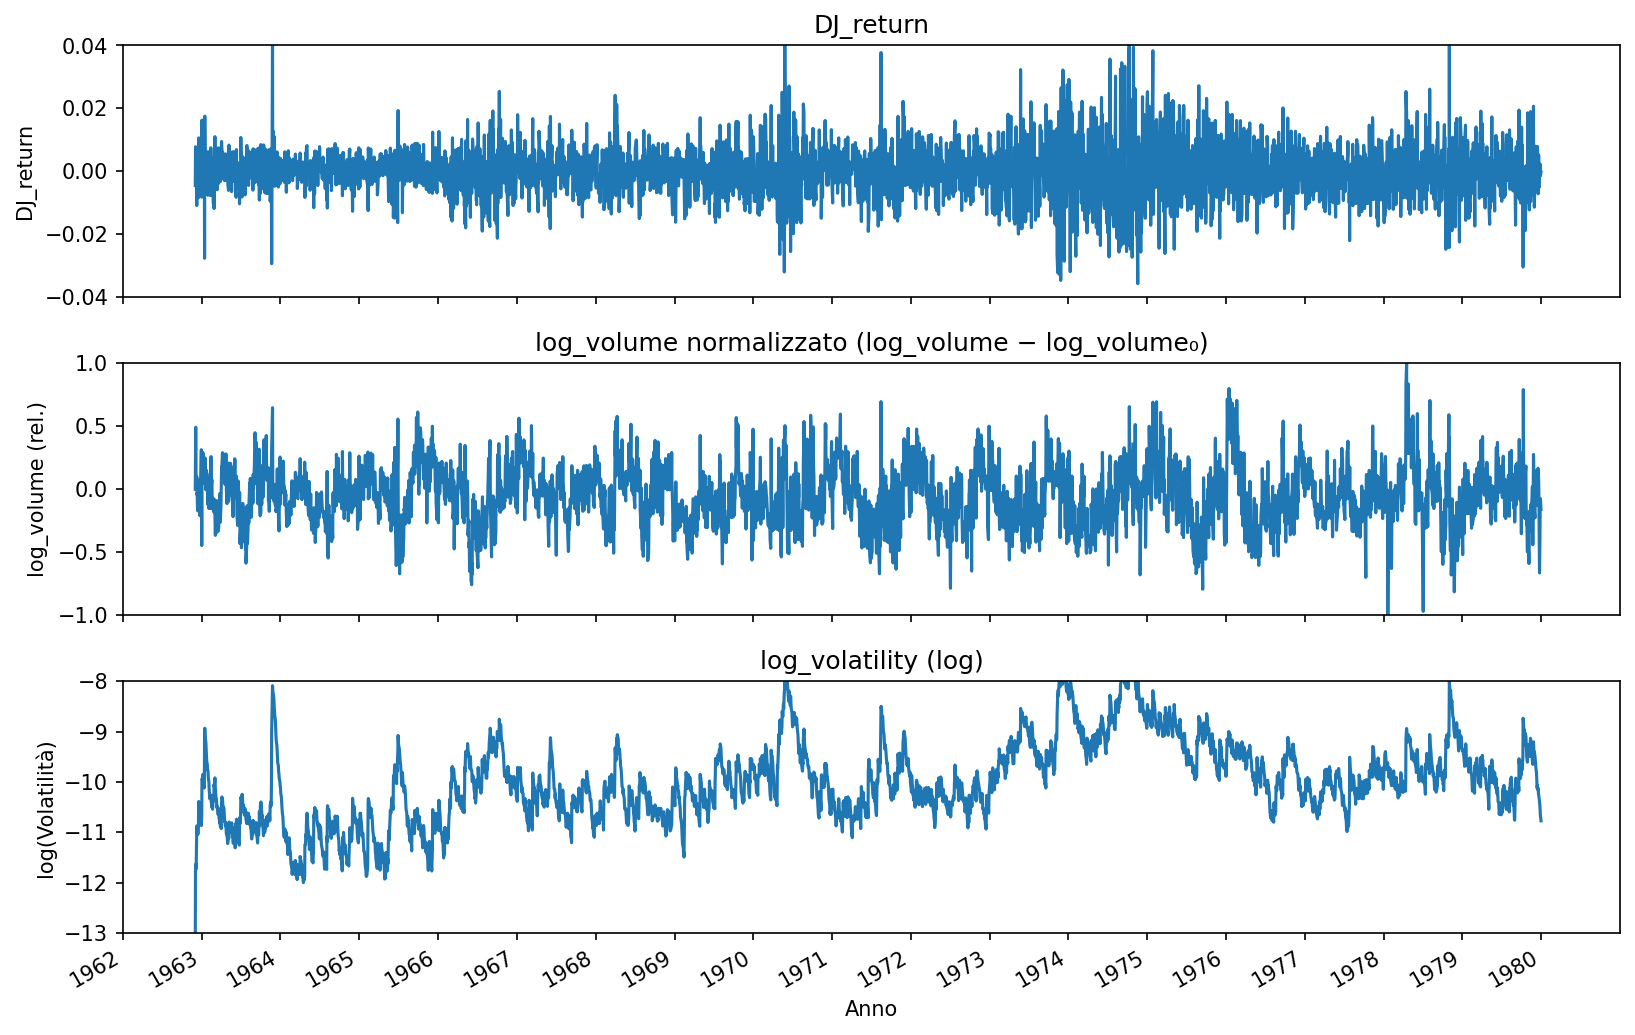

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

START = pd.Timestamp("1962-01-01")
END_OPEN = pd.Timestamp("1981-01-01")   # limite aperto: esclude qualsiasi riga del 1981+

# usa la data come DatetimeIndex (o la crea se è "colonna" e non 'indice'):
try:
    NYSE.index = pd.to_datetime(NYSE.index, errors="raise")
except Exception:
    date_col = next(c for c in NYSE.columns if "date" in c.lower())
    NYSE[date_col] = pd.to_datetime(NYSE[date_col], errors="coerce")
    NYSE = NYSE.set_index(date_col)

# --- Filtro: TRAIN == True (gestione robusta True/'true'/1/Yes) + range date < 1981
train_mask = NYSE["train"].astype(str).str.strip().str.lower().isin(["true","1","t","yes","y"])

date_mask = (NYSE.index >= START) & (NYSE.index < END_OPEN)
NYSE = NYSE.loc[train_mask & date_mask].copy()

# --- Serie (normalizza SOLO log_volume in log: logV - logV0)
dj_return       = NYSE["DJ_return"]
log_volume_rel  = NYSE["log_volume"] - NYSE["log_volume"].iloc[0]
log_volatility  = NYSE["log_volatility"]
x = NYSE.index

# --- Plot
fig, axes = plt.subplots(3, 1, figsize=(11, 7), sharex=True, dpi=150)

# DJ_return (as is)
axes[0].plot(x, dj_return)
axes[0].set_title("DJ_return")
axes[0].set_ylabel("DJ_return")
axes[0].set_ylim(-0.04, 0.04)

# log_volume normalizzato (in log)
axes[1].plot(x, log_volume_rel)
axes[1].set_title("log_volume normalizzato (log_volume − log_volume₀)")
axes[1].set_ylabel("log_volume (rel.)")
axes[1].set_ylim(-1.0, 1.0)

# log_volatility (as-is)
axes[2].plot(x, log_volatility)
axes[2].set_title("log_volatility (log)")
axes[2].set_ylabel("log(Volatilità)")
axes[2].set_ylim(-13, -8)

# Asse X: tick annuali fino al 1980 (fine train)
for ax in axes:
    ax.set_xlim(START, END_OPEN - pd.Timedelta(days=1))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xlabel("Anno")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()




Il plot del solo indice Dow Jones:

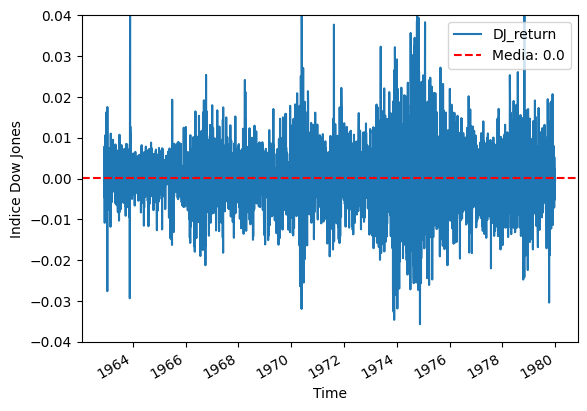

In [ ]:
ax = NYSE['DJ_return'].plot()
ax.set_xlabel('Time')
# ax.set_yscale('log')  # [se si vuole la y logaritmica]
ax.set_ylabel('Indice Dow Jones')
_ = ax.set_ylim(-0.04,0.04)

# Aggiunta della linea orizzontale al valore medio
media = NYSE['DJ_return'].mean()
ax.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.1f}')
ax.legend()

plt.show()

Lo zoom sul 1970 della colonna Dow Jones:

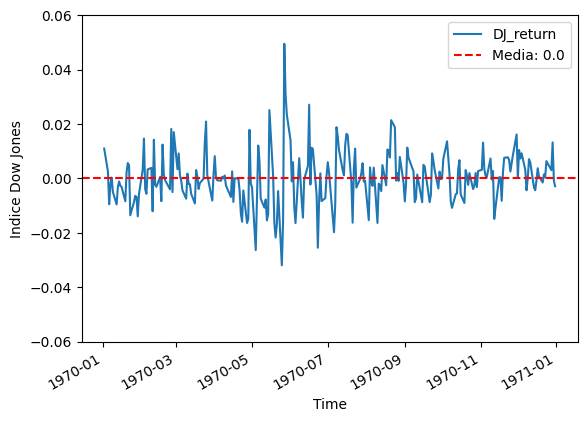

In [ ]:
ax = NYSE.loc["1970-01-01":"1970-12-31", "DJ_return"].plot()
ax.set_xlabel('Time')
# ax.set_yscale('log')  # [se si vuole la y logaritmica]
ax.set_ylabel('Indice Dow Jones')
_ = ax.set_ylim(-0.06,0.06)

# Aggiunta della linea orizzontale al valore medio
media = NYSE.loc["1970-01-01":"1970-12-31", "DJ_return"].mean()
ax.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.1f}')
ax.legend()

plt.show()

L'esame del solo training set o del solo test set:

In [ ]:
NYSE['train'].value_counts()

,count
train,
True,4281


In [ ]:
NYSE_train = NYSE[NYSE["train"]]
display(NYSE_train.head())
NYSE_test  = NYSE[~NYSE["train"]]
display(NYSE_test.head())

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1962-12-04,tues,0.007813,0.346202,-11.749305,True
1962-12-05,wed,0.003845,0.525306,-11.665609,True
1962-12-06,thur,-0.003462,0.210182,-11.626772,True
1962-12-07,fri,0.000568,0.044187,-11.728130,True


,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,


In [ ]:
NYSE["train"].value_counts()

,count
train,
True,4281


# La meccanica di base della TSA

Vediamo qui la **meccanica di base** della TSA (*Time Series Analysis*) applicata ad una serie temporale **clinico-sanitario e comportamentale**: le <u>ore di sonno annuali (giorno per giorno)</u> di un paziente sottoposto ad una terapia farmacologica sperimentalke.

La serie sia in formato **Excel**.<br>
⭐ Possiamo analizzare la serie con Excel?

**Limiti di Excel nella TSA/TSF**:
- Non ha modelli avanzati di time series (ARIMA, SARIMA, Prophet, ecc.).
- Gestisce bene dataset piccoli/medi (un anno di dati va benissimo), ma non grandi moli.<br>
  ❌ *1.048.576 rows by 16.384 columns* (fonte Microsft)
- L’analisi rimane descrittiva ed esplorativa più che predittiva.

👉 Quindi sì, Excel va bene se si vuole **esplorare e visualizzare i dati**.<br>
Se invece si vuole fare **modellistica predittiva** (forecast, ARIMA, modelli multivariati), meglio Python o R.

Vediamo come fare la TSA in Python.

Il primo passo è convertire la serie in formato **csv** (da Excel).

Quindi deve essere caricata in Python:

In [ ]:
import pandas as pd

ore_sonno = pd.read_csv('Ore di sonno.csv', sep=";")

display(ore_sonno,'\n')        # --> i dati sono ora organizzati in modo matriciale: per anno (stagione) e per mese (la frequenza).
                               #     '\n' aggiunge solo una linea vuota per separare i diversi output delle 'print'.
display(ore_sonno.info())

,Data,Ore sonno,Unnamed: 2
0,04/09/2024,3,NaN
1,05/09/2024,9.5,NaN
2,06/09/2024,1,NaN
3,07/09/2024,7,NaN
4,08/09/2024,7,NaN
...,...,...,...
360,30/08/2025,6.5,NaN
361,31/08/2025,5.75,NaN
362,01/09/2025,5.75,NaN
363,02/09/2025,6,NaN


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        365 non-null    object
 1   Ore sonno   353 non-null    object
 2   Unnamed: 2  1 non-null      object
dtypes: object(3)
memory usage: 8.7+ KB


None

Eliminiamo la colonna finale `Unnamed` (data dal ";" finale in più nel file csv):

In [ ]:
ore_sonno = ore_sonno.loc[:, ~ore_sonno.columns.str.contains('^Unnamed')]   # Elimina eventuali colonne senza nome (vuote)
display(ore_sonno)

,Data,Ore sonno
0,04/09/2024,3
1,05/09/2024,9.5
2,06/09/2024,1
3,07/09/2024,7
4,08/09/2024,7
...,...,...
360,30/08/2025,6.5
361,31/08/2025,5.75
362,01/09/2025,5.75
363,02/09/2025,6


📌 Per comprendere il codice della cella precedente potete usare l'assistente AI.

Rinominiamo le colonne (senza gli spazi) - è una **buona pratica di programmazione**.<br>
⚠️ cella non eseguibile due volte

In [ ]:
ore_sonno.rename(columns={'Ore sonno': 'Ore_sonno'}, inplace=True)
ore_sonno

,Data,Ore_sonno
0,04/09/2024,3
1,05/09/2024,9.5
2,06/09/2024,1
3,07/09/2024,7
4,08/09/2024,7
...,...,...
360,30/08/2025,6.5
361,31/08/2025,5.75
362,01/09/2025,5.75
363,02/09/2025,6


In [ ]:
ore_sonno.dtypes

,0
Data,object
Ore_sonno,object


I **valori** della serie (qui, `Ore_sonno`) devono essere in **formato numerico**, non *object* (stringa):

In [ ]:
ore_sonno["Ore_sonno"] = pd.to_numeric(ore_sonno["Ore_sonno"], errors='coerce')
display(ore_sonno)

,Data,Ore_sonno
0,04/09/2024,3.00
1,05/09/2024,9.50
2,06/09/2024,1.00
3,07/09/2024,7.00
4,08/09/2024,7.00
...,...,...
360,30/08/2025,6.50
361,31/08/2025,5.75
362,01/09/2025,5.75
363,02/09/2025,6.00


In [ ]:
ore_sonno.dtypes

,0
Data,object
Ore_sonno,float64


Adesso **trasformiamo la data**, che deve essere in formato `datetime64`.<br>
- Da `object` (stringa) a `datetime64`
- Come si è visto prima, il file CSV di input aveva le date in formato europeo (gg/mm/aaaa)

In [ ]:
ore_sonno['Data'] = pd.to_datetime(ore_sonno['Data'], dayfirst=True, errors='coerce')
                                                  # dayfirst=True → serve se le date in input sono nel formato europeo gg/mm/aaaa.
                                                  # errors='coerce' → se trova valori non validi li trasforma in NaT (Missing datetime).
ore_sonno

,Data,Ore_sonno
0,2024-09-04,3.00
1,2024-09-05,9.50
2,2024-09-06,1.00
3,2024-09-07,7.00
4,2024-09-08,7.00
...,...,...
360,2025-08-30,6.50
361,2025-08-31,5.75
362,2025-09-01,5.75
363,2025-09-02,6.00


In [ ]:
ore_sonno.dtypes           # ok, formati di colonna corretti

,0
Data,datetime64[ns]
Ore_sonno,float64


**Formati delle date**:
- In output Pandas mostra le date **in formato ISO (anno-mese-giorno)**.
- Se la si vuole vedere in formato europeo (gg/mm/aaaa) occorre formattarla **al momento della stampa/esportazione**, ad esempio con `.strftime`.
Se vogliamo vedere le date in formato europeo, dunque:

In [ ]:
ore_sonno['Data'].dt.strftime('%d/%m/%Y')

,Data
0,04/09/2024
1,05/09/2024
2,06/09/2024
3,07/09/2024
4,08/09/2024
...,...
360,30/08/2025
361,31/08/2025
362,01/09/2025
363,02/09/2025


Il **passo fondamentale**: creiamo una serie pandas con `Data` come indice.<br>
3 passi:
- impostare la colonna `Data` come **indice**, come si fa abitualmente nelle serie temporali
- estrarre la colonna `Ore_sonno` come **Serie**
- opzionale: **rinominare** la serie

⚠️ Operazioni come queste non sono eseguibili due volte.

In [ ]:
# imposta la colonna Data come indice
ore_sonno = ore_sonno.set_index('Data')
ore_sonno

,Ore_sonno
Data,
2024-09-04,3.00
2024-09-05,9.50
2024-09-06,1.00
2024-09-07,7.00
2024-09-08,7.00
...,...
2025-08-30,6.50
2025-08-31,5.75
2025-09-01,5.75


In [ ]:
# estrai la colonna 'Ore_sonno' come Serie  (prima era un DATAFRAME)
sonno_ts = ore_sonno["Ore_sonno"]
sonno_ts

,Ore_sonno
Data,
2024-09-04,3.00
2024-09-05,9.50
2024-09-06,1.00
2024-09-07,7.00
2024-09-08,7.00
...,...
2025-08-30,6.50
2025-08-31,5.75
2025-09-01,5.75


In [ ]:
type(sonno_ts)

pandas.core.series.Series

In [ ]:
# opzionale: rinomina la Serie
sonno_ts.name = "sonno_ts"

In [ ]:
print(type(sonno_ts))
display(sonno_ts.head())

<class 'pandas.core.series.Series'>


,sonno_ts
Data,
2024-09-04,3.0
2024-09-05,9.5
2024-09-06,1.0
2024-09-07,7.0
2024-09-08,7.0


In [ ]:
display(sonno_ts.head())
display("\n", type(sonno_ts),"\n")
display(sonno_ts.info())


,sonno_ts
Data,
2024-09-04,3.0
2024-09-05,9.5
2024-09-06,1.0
2024-09-07,7.0
2024-09-08,7.0


'\n'

pandas.core.series.Series

'\n'

<class 'pandas.core.series.Series'>
DatetimeIndex: 365 entries, 2024-09-04 to 2025-09-03
Series name: sonno_ts
Non-Null Count  Dtype  
--------------  -----  
346 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


None

Il **line plot**:

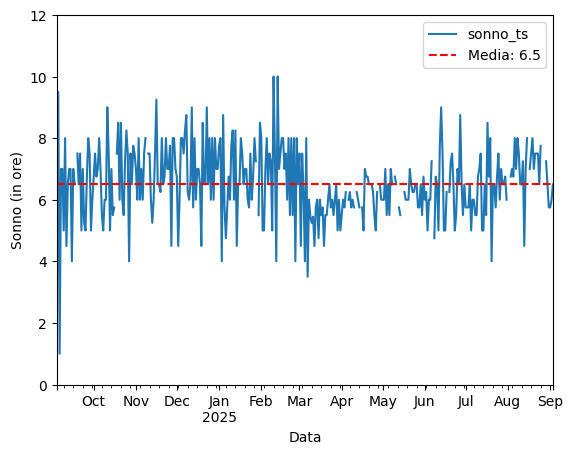

In [ ]:
import matplotlib.pyplot as plt

ax = sonno_ts.plot()
ax.set_xlabel('Data')
# ax.set_yscale('log')  # [se si vuole la y logaritmica]
ax.set_ylabel('Sonno (in ore)')
_ = ax.set_ylim(0, 12)

# Aggiunta della linea orizzontale al valore medio
media = sonno_ts.mean()
ax.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.1f}')
ax.legend()

plt.show()

Ci sono valori mancanti?<br>
👉 la seguente cella ti dice quanti valori mancanti ci sono in tutta la serie.

In [ ]:
sonno_ts.isna().sum().item()

19

Date con valori mancanti<br>
👉 ti restituisce direttamente le date (indice) dove `ore_sonno` è mancante.

In [ ]:
sonno_ts[sonno_ts.isna()]

,sonno_ts
Data,
2024-09-18,NaN
2024-10-17,NaN
2024-11-09,NaN
2025-01-29,NaN
2025-04-05,NaN
2025-04-11,NaN
2025-04-15,NaN
2025-04-28,NaN
2025-05-09,NaN


Percentuale di missing<br>
👉 ti dice la percentuale di valori mancanti.

In [ ]:
sonno_ts.isna().mean().item()

0.052054794520547946

Visualizzazione dei buchi:<br>
Un trucchetto carino: plottare una mask dei NaN (True = manca, False = c’è): così sull’asse Y vedi 0 (dato presente) e 1 (dato mancante).

<Axes: xlabel='Data'>

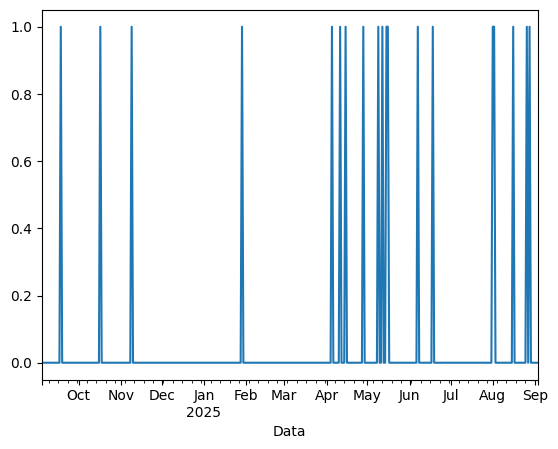

In [ ]:
sonno_ts.isna().astype(int).plot()

Uun grafico sovrapposto che mostra la serie con i “buchi” (NaN) **ben evidenziati in rosso**:

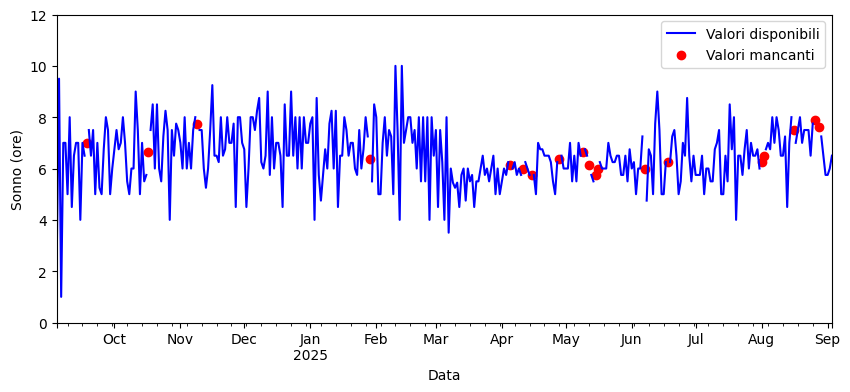

In [ ]:
import matplotlib.pyplot as plt

# serie interpolata (solo per stimare dove starebbe il valore mancante)
interp = sonno_ts.interpolate()

fig, ax = plt.subplots(figsize=(10, 4))

# linea blu = dati disponibili
sonno_ts.plot(ax=ax, style='b-', label='Valori disponibili')

# cerchi rossi = date mancanti, quota = valore interpolato
ax.scatter(
    sonno_ts.index[sonno_ts.isna()],
    interp[sonno_ts.isna()],
    color='red', marker='o', label='Valori mancanti'
)

ax.set_xlabel("Data")
ax.set_ylabel("Sonno (ore)")
ax.set_ylim(0, 12)
ax.legend()
plt.show()


---

📌I valori mancanti in una serie temporale creano **problemi sia nell’analisi (TSA) che nella previsione (TSF)**.

Nella **TSA** falsano statistiche, autocorrelazioni e rendono i grafici meno interpretabili.

Nella **TSF** impediscono l’addestramento dei modelli (ARIMA, LSTM, ecc.) e introducono bias nelle previsioni.

Se i missing **non sono casuali**, il rischio è di sottostimare trend o eventi estremi.

Soluzioni tipiche: drop, forward/backward fill, interpolazione, imputazione statistica o modelli che gestiscono direttamente i NaN.

Per semplicità scegliamo qui **la strategia più semplice, ovvero il drop**.

---

In [ ]:
sonno_ts = sonno_ts.dropna()
sonno_ts.isna().sum().item()


0

Il solito line plot per vedere l’andamento della **serie pulita (senza NaN)** e confrontarla con il **livello medio di sonno**.

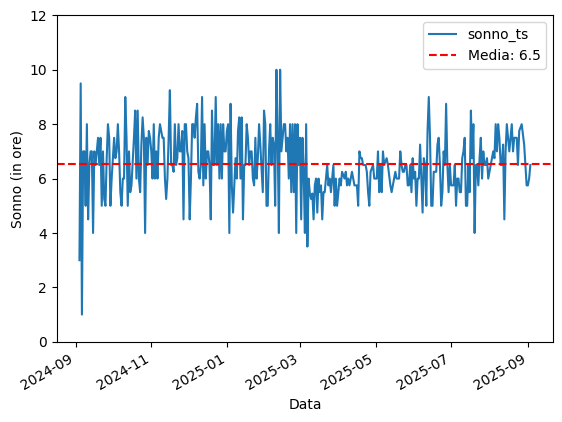

In [ ]:

ax = sonno_ts.plot()
ax.set_xlabel('Data')
ax.set_ylabel('Sonno (in ore)')
ax.set_ylim(0, 12)

media = sonno_ts.mean()
ax.axhline(y=media, color='red', linestyle='--', label=f'Media: {media:.1f}')
ax.legend()

plt.show()


Un grafico che mostra la **percentuale di valori mancanti per anno e mese**.<br>
⚠️ C'è un errore (da correggere).

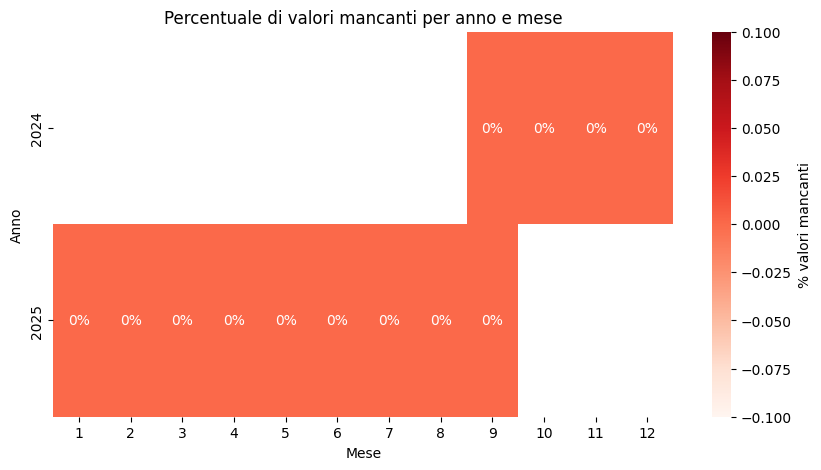

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --> servono alcune elaborazioni

# supponiamo che sonno_ts abbia indice datetime giornaliero
df = sonno_ts.isna().to_frame("missing").astype(int)

# aggiungo colonna per anno e mese
df['year'] = df.index.year
df['month'] = df.index.month

# pivot per avere una matrice anno × mese
heatmap_data = df.pivot_table(
    values="missing", index="year", columns="month", aggfunc="mean"
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data,
    cmap="Reds", cbar_kws={'label': '% valori mancanti'},
    annot=True, fmt=".0%"
)

plt.title("Percentuale di valori mancanti per anno e mese")
plt.xlabel("Mese")
plt.ylabel("Anno")
plt.show()


## TSA
Ci sono trend o stagionalità? Lo vedremo nelle prossime giornate.<br>
Per ora vediamo se ci sono auto-correlazioni, cioè se un elemento dipende da quelli prima e dopo.

L'`ACF` plot per vedere se ci sono **auto-correlazioni**:

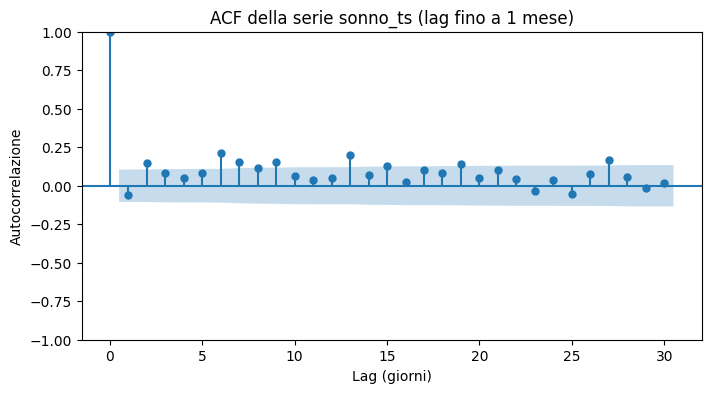

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# supponiamo serie giornaliera → 1 mese ≈ 30 giorni
lags = 30

fig, ax = plt.subplots(figsize=(8,4))
plot_acf(sonno_ts.dropna(), lags=lags, ax=ax)

ax.set_title("ACF della serie sonno_ts (lag fino a 1 mese)")
ax.set_xlabel("Lag (giorni)")
ax.set_ylabel("Autocorrelazione")

plt.show()


🔑 Note sul codice:
- `sonno_ts.dropna()` → serve perché l’ACF non accetta NaN.
- `lags=30` → significa calcolare e plottare autocorrelazioni dai lag 1 fino a 30 giorni.
- Se la serie fosse mensile, allora `lags=1` rappresenterebbe già un mese.

**Interpretazione del plot di chatGPT5**

🔎 Cosa si vede
- **`Lag 0`** = autocorrelazione perfetta (=1), come sempre.
- Per i lag **1–30 giorni**:
    - Tutte le barre stanno **dentro la fascia blu** (intervallo di confidenza al 95%), tranne piccoli picchi molto vicini al bordo.
    - Questo significa che **non c’è una correlazione significativa oltre il rumore casuale**.
- Non si vedono pattern di decrescita graduale né picchi periodici → non emerge una stagionalità chiara né un forte effetto di persistenza.

📌 Interpretazione
- La serie **non ha forte dipendenza temporale** a breve-medio termine: il numero di ore di sonno di un giorno non è fortemente legato a quello dei giorni precedenti.
- Ci sono **piccole correlazioni positive** sparse (es. lag 6–7, 13, 27), ma nessuna abbastanza forte da indicare ciclicità robusta.
- In pratica: la variabilità è più rumorosa che strutturata → un AR(1) o ARIMA di basso ordine probabilmente non spiegherebbe molto.

💡 Passi successivi possibili
- Fare anche il **PACF** → utile per vedere se ci sono pochi lag autoregressivi realmente significativi.
- Provare **un’analisi stagionale** (es. settimanale: 7, 14, 21 giorni) se ti aspetti che il sonno abbia un pattern settimanale.
- Oppure testare una **decomposizione** (`seasonal_decompose`) per **separare trend, stagionalità e residui**.

# Big Time Series

---

📌 Poichè utilizzeremo **big dataset finanziari** ($10^7$ elementi, cioè decine di milioni) è utile disporre di una **GPU**. Cosa è una GPU? Vedi [qui](https://it.wikipedia.org/wiki/GPU).

Ci sono varie possibilità in merito:
- **Google Colab** fornisce buone GPU NVIDIA dedicate (gratuite sino a 12 ore di utilizzo al mese) --> basta modificare il *run-time* (vedremo come si fa)
  
- molti PC e portatili dispongono di una GPU, che dev'essere tuttavia una **NVIDIA dedicata (con supporto *CUDA*)**. Le GPU "integrate" nel processore Intel/AMD non eseguono il package `cuDF` (vedi più avanti) e quindi non sono di aiuto con i big dataset.

👉 Se <u>non si dispone di una GPU locale e non si può usare Google Colab</u> (cosa frequente, ad esempio per divieto aziendale o mancanza di un account Google), allora si deve fare lo **slicing** del dataset, come vedremo più avanti, oppure munirsi di molta <u>pazienza ed aspettare il completamento delle varie operazioni (anche diverse ore)



Uno degli scopi di questo notebook è mostrare l’impatto dell’**accelerazione tramite GPU** su operazioni comuni e query analitiche su big data, ed allo scopo utilizza un grande dataset reale di **prezzi azionari**.

📌 Useremo `cuDF`, una libreria Python per DataFrame eseguiti su **GPU**, basata sul formato di memoria colonnare **Apache Arrow**, progettata per caricare, unire, aggregare, filtrare e manipolare dati tabellari usando un’API in stile **pandas**. [Questa](https://rapids.ai/cudf-pandas/) la documentazione ufficiale --> *Accelerating Pandas with zero code change!*

> Un ottimo articolo su come lavorare con `cuDF`, appena pubblicato dal sito *Machine Learning Mastery* (dal titolo *A Hands-On Introduction to cuDF for GPU-Accelerated Data Workflows*), è disponibile [qui](https://machinelearningmastery.com/a-hands-on-introduction-to-cudf-for-gpu-accelerated-data-workflows/).

`cuDF ` offre una modalità di esecuzione accelerata per *pandas* (`cudf.pandas`), che consente di velocizzare i notebook scritti con pandas **senza richiedere modifiche al codice**.

Per una spiegazione più approfondita su come funziona `cuDF `dietro le quinte, consiglio di provare il notebook Colab [“10 Minutes to RAPIDS cuDF's pandas accelerator mode (cudf.pandas)”](https://nvda.ws/rapids-cudf) o visitare [https://rapids.ai/cudf-pandas](https://rapids.ai/cudf-pandas/).

Vedi anche il capitolo di questo notebook dedicato alle analisi con `cudf`.

----
> L'installazione di `cudf` in Windows 10 non è semplice. Vedi il capitolo apposito.<br>
> 👉 **In Google Colab `cuDF` è già pre-installato di default**.
----

Perchè `cuDF` e non `spark`? --> vedi prossimo video.

# Verifica del setup

Per prima cosa, verifichiamo se abbiamo una **GPU NVIDIA** disponibile, con il seguente comando.<br>
Ce l'abbiamo se abbiamo scelto un runtime con GPU (in Google Colab)! Oppure se il PC/portatile ne è dotato.

In [ ]:
!nvidia-smi

Thu Sep 25 21:54:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

-----
Se stiamo lavorando con *Jupyter Notebook* e **su un PC senza GPU** (come è frequente nei PC aziendali e nei portatili)lavoreremo con *pandas* usando lo **slice** del dataset per avere tempi di esecuzione accettabili.

Se abbiamo scelto un *runtime* Colab con **HGPU abilitata** attivo, siamo pronti per iniziare.
Il package python **cuDF è infatti già installato di default** quando si utilizza un runtime con GPU.

-----



# Misurazione dei tempi di risposta
Poichè questo notebook tratta BIG DATA, la misurazione dei tempi di risposta di alcune celle è importante.

Useremo il **comando magic `%time`**. Si noti tuttavia che:

---

⚠️ 1. `%time` misura solo il **tempo CPU** del codice Python, e cioè:
- tempo utente CPU (`user`)
- tempo sistema CPU (`sys`)
- tempo totale CPU (`total`)
- tempo a muro (`Wall time`), ma solo per **l'esecuzione del codice Python puro**, non per operazioni "estese" o "lazily evaluated".

NB. Se si è scelto un runtime GPU o TPU, `%time` misura solo **il tempo che il kernel Jupyter impiega a eseguire la cella in Python lato CPU** — cioè il tempo che impiega Python a mandare il lavoro alla GPU o alla TPU, e **ricevere il risultato**.

---

🔁 2. Il primo avvio può includere **latenze extra**:

Quando si esegue per la **prima volta** una cella che include plotting o import di librerie, è possibile avere:

* inizializzazione del backend di `matplotlib`
* carico GPU/CPU non ancora ottimizzato
* compilazione JIT di alcune funzioni
  Tutti questi step **non sono conteggiati** in `%time`.

---

🐼 3. I plot grafici - sia di `matplotlib` che di `pandas.plot` - sono **lazily evaluated**

Ad esempio, il metodo `plot.box()` genera la figura **ma non forza il rendering completo** nel momento in cui viene chiamato. Google Colab esegue poi il rendering del grafico **in un secondo momento**, **fuori dal contesto di `%time`**, ad esempio nel thread di frontend del notebook.

🧠 In pratica:

* `%time` misura solo quanto tempo ci vuole per **preparare il grafico**, non per **visualizzarlo**.
* La visualizzazione del boxplot nel browser (in HTML+JS) può essere lenta, specialmente con grafici complessi, immagini grandi o ambienti con GPU come le T4 (che a volte causano latenza anche lato frontend).

---

### ✅ Come misurare meglio il tempo reale percepito?

Se vuoi misurare **l’intero tempo reale di esecuzione**, incluso **rendering e latenza**:

```python
import time
start = time.time()

# la logica
q_low = df[['open', 'close']].quantile(0.01)
q_high = df[['open', 'close']].quantile(0.99)
filtered_df = df[
    (df['open'] >= q_low['open']) & (df['open'] <= q_high['open']) &
    (df['close'] >= q_low['close']) & (df['close'] <= q_high['close'])
]
filtered_df[['open', 'close']].plot.box()

end = time.time()
print(f"Tempo totale (incluso rendering): {end - start:.2f} secondi")
```

---

### 💡 In sintesi:

* `%time` misura solo **la parte CPU del codice Python**, non il rendering o la latenza di backend/Colab.
* Il tempo che si percepisce include anche **rendering del grafico**, **interfaccia web** e **lentezze di rete/front-end**.
* Se si vuole un tempo reale più affidabile, si può usare `time.time()` manualmente.

---
**Atenzione**<br>
Anche con `time.time()` attorno a `plot()` e `plt.show()`, il tempo misurato NON include tutta la lazy evaluation, specialmente quella che avviene:
- dopo il ritorno della cella (es. il rendering effettivo dell'immagine nel frontend del browser)
- oppure nel backend grafico di matplotlib, che può differire tra ambienti (Agg, TkAgg, inline, etc.)


# Download della big time series

Il dataset con cui lavoreremo è un sottoinsieme del dataset [**USA 514 Stocks Prices NASDAQ NYSE**](https://www.kaggle.com/datasets/olegshpagin/usa-stocks-prices-ohlcv/data), anche disponibile su [Kaggle](https://www.kaggle.com/datasets).

Scarichiamo il dataset NON da Kaggle ma dal "Public Google Cloud Storage bucket" di NVIDIA, per garantire velocità di download maggiori.

Il "Public Google Cloud Storage bucket" di NVIDIA è uno spazio online dove NVIDIA mette a disposizione file pubblici (come dataset, modelli, esempi di codice) che chiunque può scaricare.
È un po’ come un grande armadio digitale aperto a tutti, ospitato su Google Cloud.

Questo download richiede **meno di 30 secondi** (3-5 secondi con il runtime *v2-8 TPU*)



In [ ]:
if IN_COLAB:
    !if [ ! -f "usa_stocks_30m.parquet" ]; then curl https://storage.googleapis.com/rapidsai/colab-data/usa_stocks_30m.parquet -o usa_stocks_30m.parquet; else echo "usa_stocks_30m.parquet found"; fi
else:   # Jupyter Notebook
    import urllib.request

    file_path = "usa_stocks_30m.parquet"
    url = "https://storage.googleapis.com/rapidsai/colab-data/usa_stocks_30m.parquet"

    if not os.path.isfile(file_path):
        print(f"Scarico il file {file_path}...")
        urllib.request.urlretrieve(url, file_path)
        print("Download completato.")
    else:
        print(f"{file_path} già presente.")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  633M  100  633M    0     0  19.4M      0  0:00:32  0:00:32 --:--:-- 21.8M


📌 **Nota sul funzionamento della cella precedente**<br>
Analizziamo la **seconda** riga (la **prima** semplicemente è un TEST per determinare **l'ambiente di esecuzione del notebook**: Colab oppure Jupyter).<br>
Essa si attiva se il test di ambiente della prima riga ha dato come risultato `True`, cioè l'ambiente è **Colab**.<br>
La prima porzione della seconda riga:
```bash
    if [ ! -f "usa_stocks_30m.parquet" ]; then curl ... ;fi
```
- è un comando [*Bash*](https://it.wikipedia.org/wiki/Bash) (la shell tipica di Linux/Unix, anche usata in macOS e in ambienti come Google Colab/Jupyter con il prefisso !)
- controlla se **il file non esista già** nella cartella corrente
- `fi` in *Bash* significa semplicemente “fine del blocco if”
- i costrutti come `if [ ... ]; then ... fi` sono tipici di `bash`, non sono compatibili con `cmd` di Windows.

La seconda porzione:
```bash
then curl ... -o usa_stocks_30m.parquet
```
- si attiva se il file **non esiste** ancora e lo **scarica** dal link indicato e lo salva in un file di nome `usa_stocks_30m.parquet` (tramite il parametro `-o`).

La terza porzione, infine:
```bash
else echo "usa_stocks_30m.parquet found"
```
- si attiva se il file esiste già e stampa il messaggio che è stato trovato già presente.

---
NB. Colab usa **una shell bash Linux** dietro il comando !, quindi si possono usare comandi come `if [ ... ]; then ...` direttamente, come si farebbe in un terminale Linux.

---
La **terza riga** di codice si attiva se l'ambiente di esecuzione è **Jupyter** (o meglio, non è Colab):
- il codice di questo ramo `else` esegue le stesse azioni del ramo precedente di Google Colab, con alcune differenze date dall'ambiente diverso, e cioè:
- importa alcune librerie python
- definisce la variabile `file_path` e la variabile `url` (per comodità - non è possibile nel ramo Colab perchè il codice è compatto: una sola riga!)
- verifica se il file esiste già;
- se non esiste: download con messsaggi informativi all'utente;
- se esiste già: messaggio informativo all'utente

📌 **Nota sul significato del `!`**<br>
In <u>Jupyter</u> vale questa regola:
- `!comando` → esegue `comando` in una shell del sistema (di default la prima che trova).
- su Windows → normalmente la shell è `cmd.exe`, ma:
    - se hai installato **Git for Windows** (anche solo per *GitHub Desktop*), ti ritrovi `bash.exe` nel PATH,
    - se hai **Anaconda/Miniconda**, dentro ci sono spesso utilità Unix-like (`sh`, `bash`, `curl`, `grep`, ecc.),
    - se hai **WSL¹**, Jupyter può usarlo.
- su Linux/macOS → quella shell è `Bash`.

¹ *WSL* è una funzionalità integrata in Windows 10 e 11 che permette di installare e far girare un vero ambiente Linux direttamente dentro Windows, senza bisogno di macchine virtuali o dual boot.

In <u>Google Colab</u>, quando si usa il prefisso `!` in una cella, il comando viene eseguito nella shell del **sistema Linux sottostante**.<br>
Colab gira su macchine virtuali **Ubuntu Linux**, quindi la shell di default è `bash` (*/bin/bash*).



-----
In <u>Google Colab</u> il file `usa_stocks_30m.parquet` è ora **disponibile nella *session storage*** di Google Colab (icona cartella nella barra verticale di sinistra - tooltip `Files`).<br>
In <u>Jupyter notebook</u> il file `usa_stocks_30m.parquet` è ora **disponibile nella directory corrente**.


-----

La **directory corrente** si verifica con il comando: `%pwd` ed in genere è quella del notebook.

In [ ]:
%pwd

'/content'

Gli oggetti caricati in memoria (di Google Colab o di Jupyter Notebook) si verificano così:

In [ ]:
%who

IN_COLAB	 Image	 display	 google	 os	 pd	 


I file della directory corrente (di Windows, cioè nel ramo Jupyter) si verificano così:

In [ ]:
%ls

'Ore di sonno.csv'       stocks_3titoli_2020_2024.csv
 recap_TS_chatGPT5.png   usa_stocks_30m.parquet
 sample_data/            variabili_endogene_esogene.png


⚠️ Il file `usa_stocks_30m.parquet` deve essere presente nella directory, con dimensione circa di **664 MB**.

**Il file `usa_stocks_30m.parquet`**<br>

Il file `usa_stocks_30m.parquet` è un dataset messo a disposizione dal team RAPIDS (NVIDIA) per fare esempi di analisi su big time series finanziarie con librerie GPU-accelerate (tipo `cuDF`).

📌 In pratica:
- È un file in **formato *Parquet*** (colonnare, compresso, molto efficiente per big data).
- Contiene dati di **prezzi azionari USA** (titoli quotati) registrati con una **frequenza di 30 minuti**.
- È pensato per dimostrazioni: analisi di serie temporali, manipolazione con pandas/cuDF, benchmark CPU vs GPU.

📊 Tipicamente include:
- ticker → il simbolo del titolo (es. AAPL, MSFT).
- timestamp → la data/ora della rilevazione (ogni 30 min).
- open, high, low, close, volume (OHLCV) → classici campi di trading.

📐 Dimensioni indicative:
- Circa **36 milioni di righe**,
- Grandezza **~ 600–700 MB** in formato Parquet,
- **Se convertito in CSV diventerebbe molto più pesante (anche diversi GB)**.


---

# Formati delle big time series
I formati **più frequenti** delle big time series finanziarie sono:

- **CSV** (*Comma-Separated Values*)
    - È il più comune: ogni riga = timestamp + variabili (open, high, low, close, volume…).
    - Pro: universale, leggibile ovunque.
    - Contro: file enormi, parsing lento, nessuna compressione.
    - Esempio: Yahoo Finance, Kaggle dataset.
- **Parquet** (*Apache Parquet*)
    - Colonnare, compresso, perfetto per dataset giganti.
    - Supporta slicing su subset di colonne → molto veloce.
    - Usato da **RAPIDS/cuDF**, *Spark*, Dask, Arrow.
    - Esempio: Kaggle “usa_stocks_30m.parquet” (36M righe, 8GB).

<br>

Formati **specifici finanziari / tick data**:
- Tick Database proprietari (es. KDB+, OneTick, InfluxDB, QuestDB)
    - Usati per dati di mercato ad altissima frequenza (millisecondi / microsecondi).
    - Ottimizzati per query time-series, compressione verticale.
- Binary format delle borse
    - Es. NASDAQ ITCH, CME MDP 3.0, FIX protocol logs.
    - File raw compressi, spesso in .gz o .bz2.
    - Necessitano di parser dedicati.


---


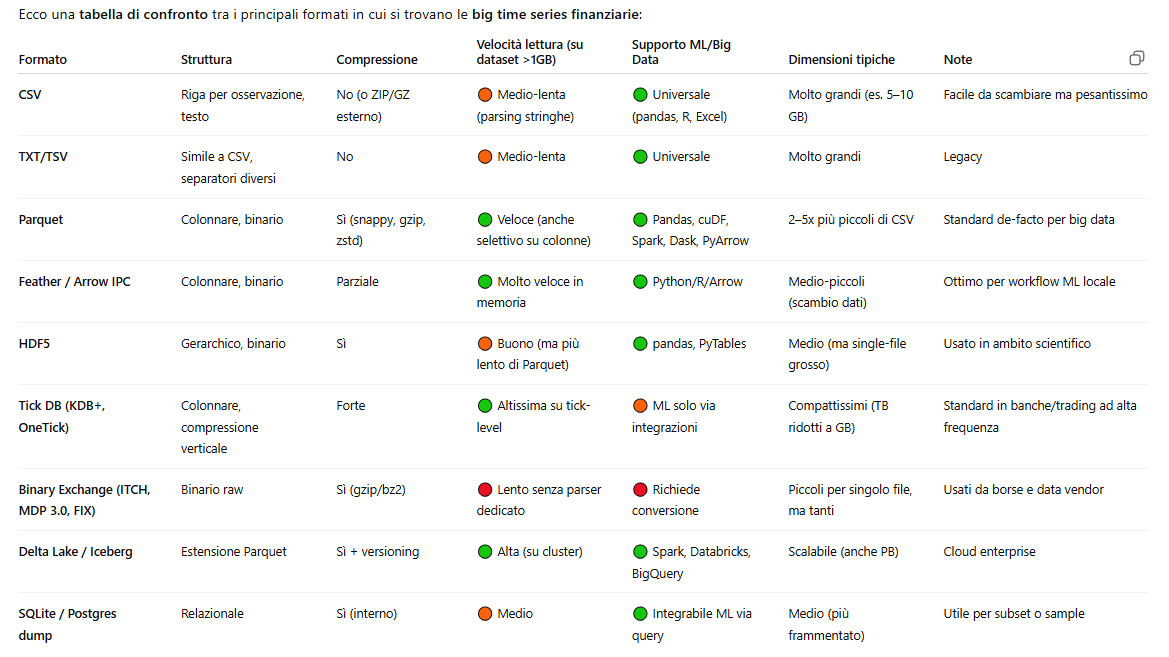

In [ ]:
Image('tabella_formati_TS.png') if IN_COLAB else display(Image(filename='tabella_formati_TS.png'))

🔑 Regola pratica:
- **CSV** → ottimo per scambio semplice ma ingestibile su big dataset.
- **Parquet** → la scelta migliore per AI/ML e big time series.
- **Tick DB** / Binary Exchange → solo in ambito professionale HFT.
- **Feather** → per lavorare in Python/R quando servono velocità e leggerezza.

---

# Scaricare un file *csv*

Il formato **csv** è uno dei più diffusi nella Data Science e nel Machine Learning.<br>
Poniamo che il **vostro** file *csv* si chiami `nuovo_dataset.csv` e l’URL del file sia `https://example.com/data/nuovo_dataset.csv`.<br>

Basta modificare la precedente cella di download in <u>2 punti</u>:
- nel ramo **Colab**:
```bash
!if [ ! -f "nuovo_dataset.csv" ]; then curl https://example.com/data/nuovo_dataset.csv -o nuovo_dataset.csv; else echo "nuovo_dataset.csv found"; fi
```

- nel ramo **Jupyter**:
```python
file_path = "nuovo_dataset.csv"
url = "https://example.com/data/nuovo_dataset.csv"
```

# Test “cold vs warm cache”
Cioè leggi due volte di fila. Se la seconda è molto più veloce → impatto forte della cache.

In [ ]:
import time, pandas as pd
t0=time.time(); df=pd.read_parquet("usa_stocks_30m.parquet"); t1=time.time()
t2=time.time(); df2=pd.read_parquet("usa_stocks_30m.parquet"); t3=time.time()
print("Prima lettura:", round(t1-t0,3),"s  | Seconda:", round(t3-t2,3),"s")


Prima lettura: 1.933 s  | Seconda: 1.707 s


> Sul mio PC (16GB di RAM, CPU di 4GHz) ho ottenuto:<br>
`Prima lettura: 6.103 s  | Seconda: 3.765 s`

# Analisi con pandas standard

In [ ]:
import pandas as pd

La `import` ha caricato la versione standard di *pandas*, non `cudf.pandas`, anche se il run-time è GPU.

Oppure, **in alternativa** (<U>con una GPU, non con una TPU e neppure con una CPU senza GPU</u>):

In [ ]:
# %load_ext cudf.pandas
# import pandas as pd

## Lettura del dataset ed info chiave

Con la normale funzione di pandas standard `pd.read_parquet` carichiamo il file in un dataframe pandas di nome  `df`.

Il formato *parquet*, [qui](https://en.wikipedia.org/wiki/Apache_Parquet) descritto, è un formato di archiviazione dati a colonne, gratuito ed open-source, dell'ecosistema Apache Hadoop.
> È simile a *RCFile* e *ORC*, gli altri formati di file di archiviazione a colonne di Hadoop.

Il formato *Parquet* è un formato **ottimizzato per lo storage e il recupero efficiente dei dati, particolarmente utile per l'analisi di grandi dataset**. In Python, si possono utilizzare librerie come `pyarrow` o `fastparquet` per leggere e scrivere file Parquet.

Il comando magic `%time` riporta il **tempo di esecuzione della cella**, un aspetto importante con i big data.

In [ ]:
%time
df = pd.read_parquet("usa_stocks_30m.parquet")         # 1 secondo con Jupyter
                                                       # con T4-GPU e RAM elevata: 7 secondi (
df.info()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
<class 'pandas.core.frame.DataFrame'>
Index: 36087094 entries, 0 to 36919
Data columns (total 7 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ms]
 1   open      float64       
 2   high      float64       
 3   low       float64       
 4   close     float64       
 5   volume    int64         
 6   ticker    object        
dtypes: datetime64[ms](1), float64(4), int64(1), object(1)
memory usage: 2.2+ GB


Il metodo pandas `df.info()` fornisce una bella panoramica informativa del dataframe.


Attenzione: in pandas il data type `object` significa stringa alfanumerica.

**Nota sui tempi**<br>
👉 Come è possibile che il caricamento su Jupyter sia molto più veloce che su Colab con TPU??<br>
**`pandas.read_parquet` usa solo la CPU. La T4 non accelera nulla qui.** In Colab la CPU è spesso meno performante.

------
Il **formato Parquet** è un formato di file a colonne open source, ottimizzato per lo storage e il recupero efficiente dei dati, particolarmente utile per l'analisi di grandi dataset. In Python, si possono anche utlizzare librerie come `pyarrow` o `fastparquet` per leggere e scrivere file Parquet.

------

Il PDF `I_O Optimization in Data Projects - by Avi Chawla.pdf` contiene un **interessante confronto tra formati dei file**.<br>
Per prima cosa dobbiamo caricare il PDF nella diretory `content`. Usiamo un modo alternativo a quello usato per caricare le immagini (funziona solo in Google Colab). Eseguiamo la seguente cella e poi premiamo il bottone *Choose Files*:

In [ ]:
if IN_COLAB:
  from google.colab import files
  uploaded = files.upload()  # si aprirà un prompt per caricare il PDF

Come verifica vediamo il contenuto della nostra directory `content`:

In [ ]:
if IN_COLAB:
  %ls /content

'Ore di sonno.csv'              tabella_formati_TS.png
 recap_TS_chatGPT5.png          usa_stocks_30m.parquet
 sample_data/                   variabili_endogene_esogene.png
 stocks_3titoli_2020_2024.csv


A questo punto possiamo accedere al PDF da dentro il notebook (la seguente cella funziona solo in Jupyter Notebook). Soluzioni alternative per Google Colab non sembrano funzionare (--> aprire il file PDF da Windows host):

In [ ]:
if not IN_COLAB:
  from IPython.display import IFrame
  IFrame("files/content/confronto.pdf", width=1000, height=600)

<p style="color:red; font-size:18px; font-weight:bold;">
🚨 Nella cella precedente di codice sostituite "usa_stocks_30m.parquet" con il VOSTRO dataset "parquet". <br>
Se il formato del vostro file è "CSV" usate la funzione "pd.read_csv" (anzichè "pd.read_parquet").<br>
A questo punto il dataframe "df" conterrà il VOSTRO dataset e il resto di questo notebook funzionerà invariato al 99%! 🚨
</p>

Vediamo ora la classe alla quale l'oggetto `df` appartiene:

In [ ]:
type(df)   # la classe alla quale l'oggetto df appartiene
           # quindi possiamo applicare all'oggetto 'df' tutti i metodi della classe dataframe

pandas.core.frame.DataFrame

> Nella OOP ci sono 3 concetti chiave:
> - classe
> - l'oggetto (l'istanza della classe)
> - i metodi, cioè le funzioni applicabili agli oggetti di quella classe


Vediamo ora le prime righe del dataframe:

In [ ]:
df.head()

,datetime,open,high,low,close,volume,ticker
0,1999-11-18 17:00:00,45.56,50.00,45.50,46.00,9275000,A
1,1999-11-18 17:30:00,46.00,47.69,45.82,46.57,3200900,A
2,1999-11-18 18:00:00,46.56,46.63,41.00,41.00,3830500,A
3,1999-11-18 18:30:00,41.00,43.38,40.37,42.38,3688600,A
4,1999-11-18 19:00:00,42.31,42.44,41.56,41.69,1584300,A


e le ultime:

In [ ]:
df.tail()

,datetime,open,high,low,close,volume,ticker
36915,2024-03-13 21:00:00,177.85,177.88,177.19,177.19,109541,ZTS
36916,2024-03-13 21:30:00,177.17,177.82,176.81,176.81,139441,ZTS
36917,2024-03-13 22:00:00,176.81,177.48,176.64,176.97,137930,ZTS
36918,2024-03-13 22:30:00,177.02,177.58,175.99,176.06,930243,ZTS
36919,2024-03-13 23:00:00,176.06,176.58,176.02,176.23,712612,ZTS


 Il dataset riporta il cosiddetto **OHLCV azionario storico** (Open, High, Low, Close, and Volume), cioè informazioni sui **prezzi azionari** di vari titoli (`ticker`) e altri attributi legati al trading, per diverse aziende (514 - da qui il nome del dataset), <u>a intervalli di circa 30 minuti</u>. La volatilità dei prezzi dei titoli NASDAQ è molto alta (ci sono molte compravendite), i prezzi OHLCV sono riferiti al singolo intervallo. In particolare il prezzo open è quello all'inizio dell'intervallo, il prezzo close è quello alla fine dell'intervallo.

 Il  **ticker** nelle borse è il nome del titolo azionario.


E vediamo le sue dimensioni:

In [ ]:
df.shape

(36087094, 7)

Abbiamo circa **36 milioni di righe e 7 colonne**.

Vediamo i nomi delle sue colonne:


In [ ]:
list(df.columns)

['datetime', 'open', 'high', 'low', 'close', 'volume', 'ticker']

E' importante distinguere le variabili numeriche in **quantitative** e **qualitative**:<br>
Image('/content/variables_types.png')

In [ ]:
df.select_dtypes('number')   # legge solo le colonne numeriche

,open,high,low,close,volume
0,45.56,50.00,45.50,46.00,9275000
1,46.00,47.69,45.82,46.57,3200900
2,46.56,46.63,41.00,41.00,3830500
3,41.00,43.38,40.37,42.38,3688600
4,42.31,42.44,41.56,41.69,1584300
...,...,...,...,...,...
36915,177.85,177.88,177.19,177.19,109541
36916,177.17,177.82,176.81,176.81,139441
36917,176.81,177.48,176.64,176.97,137930
36918,177.02,177.58,175.99,176.06,930243


In [ ]:
df.select_dtypes('object')    # legge solo le colonne stringa

,ticker
0,A
1,A
2,A
3,A
4,A
...,...
36915,ZTS
36916,ZTS
36917,ZTS
36918,ZTS


## Analisi dati esplorativa (EDA)

In [ ]:
Image('EDA.png') if IN_COLAB else display(Image(filename='EDA.png'))

In [ ]:
df.dtypes

,0
datetime,datetime64[ms]
open,float64
high,float64
low,float64
close,float64
volume,int64
ticker,object


In [ ]:
import time
start = time.time()

display(df.select_dtypes('number').describe())                     # tempo di esecuzione con T4-GPU e RAM elevata: 6 secondi

end = time.time()
print(f"Tempo totale (incluso rendering): {end - start:.2f} secondi")

,open,high,low,close,volume
count,36087094.00,36087094.00,36087094.00,36087094.00,36087094.00
mean,85.46,85.71,85.21,85.46,331053.39
std,165.06,165.52,164.58,165.06,1460115.50
min,0.06,0.06,0.00,0.06,0.00
25%,31.63,31.75,31.53,31.63,30100.00
50%,51.74,51.89,51.58,51.74,85194.00
75%,87.81,88.04,87.58,87.82,240806.75
max,7816.84,7825.00,7799.51,7812.00,746516772.00


Tempo totale (incluso rendering): 5.03 secondi


Per eliminare la [notazione scientifica](https://it.wikipedia.org/wiki/Notazione_scientifica), possiamo fare così:

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
display(df.select_dtypes('number').describe())

,open,high,low,close,volume
count,36087094.00,36087094.00,36087094.00,36087094.00,36087094.00
mean,85.46,85.71,85.21,85.46,331053.39
std,165.06,165.52,164.58,165.06,1460115.50
min,0.06,0.06,0.00,0.06,0.00
25%,31.63,31.75,31.53,31.63,30100.00
50%,51.74,51.89,51.58,51.74,85194.00
75%,87.81,88.04,87.58,87.82,240806.75
max,7816.84,7825.00,7799.51,7812.00,746516772.00


Per ripristinarla, così:

In [ ]:
pd.reset_option('display.float_format')

**Cosa ci dice la `describe ` del dataframe?**<br>
La maggior parte delle colonne legate ai prezzi sembra ben distribuita, senza valori massimi fuori scala o strani.

La colonna del volume mostra una varianza elevata, ma è comprensibile: alcune azioni vengono scambiate **molto più spesso di altre**. Inoltre, il dataset copre un ampio intervallo temporale, che va dal 1998 al 2024.

Queste informazioni temporali sono importanti.
Trattandosi di dati per singola azione, è probabile che alcuni titoli siano "entrati" nel dataset in momenti diversi.

Alcune tipiche trasformazioni della serie (**da finire**).

**Prima** trasformazione:

In [ ]:
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df['Month'], format='%d/%m/%Y')
display(Amtrak_df.head())
Amtrak_df.dtypes

La **seconda** trasformazione: convertiamo la colonna dei VALORI della serie in un oggetto pandas *Series* (l'argomento `name` è usato per dare un nome alla serie) e creiamo un nuovo indice sulla colonna `date` (creata prima):

In [ ]:
ridership_ts = pd.Series(Amtrak_df['Ridership'].values, index=Amtrak_df['Date'], name='Ridership')

display(ridership_ts.head())
print("\n", type(ridership_ts),"\n")
ridership_ts.info()

Attenzione: il data type *Series* di pandas è un generico VETTORE di elementi numerici (come può  esserlo anche una colonna di un dataframe) e NON rappresenta necesariamente una serie temporale (time series).

Come **terza** trasformazione **inferiamo la frequenza** della serie dall'indice della serie (la frequenza di base, qui mensile) e incorporiamola in un **nuovo indice**.<br>
Si noti che questo è un altro modo per rilevare l'eventuale mancanza di mesi nella serie. Se infatti, nella cella seguente, usiamo  gli oggetti precedenti (`ridership_ts_MV`) il codice funziona ma la *freq* rilevata e visualizzata in basso è *None*.

In [ ]:
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, freq=ridership_ts.index.inferred_freq)
ridership_ts.index

Spieghiamo meglio la precedente trasformazione:

```python
pd.DatetimeIndex(ridership_ts.index, ...)
```
    - Ricostruisce l’indice della serie `ridership_ts` come un `DatetimeIndex` (oggetto pandas dedicato alle date).
    - Serve per assicurarsi che l’indice sia effettivamente trattato come serie temporale.
```python
ridership_ts.index.inferred_freq
```
    - Pandas cerca di indovinare la frequenza della serie temporale analizzando la spaziatura tra le date (giornaliera, mensile, settimanale, ecc.).
    - Se riconosce una frequenza costante, restituisce una stringa tipo "D", "M", "W", "H".
    - Se non riesce a dedurre una frequenza → restituisce None.

```python
freq=... dentro DatetimeIndex
```
    - Imposta esplicitamente l’attributo `freq` dell’indice (cioè la frequenza temporale dei dati).
    - Questo è utile perché molti modelli di forecasting in `statsmodels` o `pandas` richiedono che l’indice abbia una freq definita (non `None`).

In [ ]:
ridership_ts.info()

## La correlazione
La [correlazione](https://it.wikipedia.org/wiki/Correlazione_(statistica)) esprime il grado col quale due variabili casuali (cioè nel Machine Learning due colonne del dataframe) NUMERICHE quantitative **variano insieme**. La correlazione positiva può assumere valori tra 0 ad 1, la correlazione negativa tra 0 a -1.<br>
La [matrice di correlazione](https://en.wikipedia.org/wiki/Covariance_matrix), che è la matrice di varianza/covarianza standardizzata, riporta le correlazioni di tutte le coppie. E' una matrice quadrata (il numero delle righe è uguale a quello delle colonne) ed è simmetrica (la matrice triangolare superiore è uguale alla matrice triangolare inferiore).<br>
La diagonale principale è fatta solo da 1, perchè ogni variabile correla perfettamente con se stessa.<br>
La correlazione è interessante da |0.6| in su. Sotto tale valore soglia la correlazione eventuale tra due variabili è mero caso ed in un nuovo differente dataset probabilmente non sarà più rilevata con tale magnitudo.

In [ ]:
round(df.corr(method="pearson", numeric_only=True),2)        # la matrice di correlazione di Pearson (il default)

,open,high,low,close,volume
open,1.00,1.00,1.00,1.00,-0.05
high,1.00,1.00,1.00,1.00,-0.05
low,1.00,1.00,1.00,1.00,-0.05
close,1.00,1.00,1.00,1.00,-0.05
volume,-0.05,-0.05,-0.05,-0.05,1.00


Se le colonne del dataframe sono molte, l'esame visivo della matrice di correlazione, alla ricerca di valori alti, non è banale. Può essere semplificata visualizzando solo la matrice triangolare superiore (od inferiore), in questo modo:

In [ ]:
corr_matrix = df.corr(method='pearson',numeric_only=True)

# maschera la matrice triangolare inferiore
import numpy as np
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

print(round(upper_tri,5))

        open  high  low  close  volume
open     NaN  1.00 1.00   1.00   -0.05
high     NaN   NaN 1.00   1.00   -0.05
low      NaN   NaN  NaN   1.00   -0.05
close    NaN   NaN  NaN    NaN   -0.05
volume   NaN   NaN  NaN    NaN     NaN


**Esame della matrice di correlazione**
* valori > |0.7| indicano possibili correlazioni significative
* **le correlazioni tra i prezzi sono chiaramente molto alte!**

L'argomento `numeric_only` del metodo `corr` è una COMODA alternativa al metodo `select_dtypes`.

Come si misura la correlazione di **Spearman** (utile a rilevare le relazioni non-lineari)?<br>
<u>Come sempre</u>, posizionando il cursore tra le parentesi tonde di un metodo o di una funzione e permendo la combinazioone di tasti `maiusc` + `tab` compare una finestra di pop-up che contiene l'elenco degli argomenti della funzione/metodo con i loro possibili valori.

In [ ]:
import time
start = time.time()

display(round(df.corr(method='spearman',numeric_only=True),2))  # la matrice di correlazione di Pearson (il default)
                                                                # tempo di esecuzione su T4-GPU e RAM elevata: 35 secondi

end = time.time()
print(f"Tempo totale (incluso rendering): {end - start:.2f} secondi")

,open,high,low,close,volume
open,1.00,1.00,1.00,1.00,-0.22
high,1.00,1.00,1.00,1.00,-0.22
low,1.00,1.00,1.00,1.00,-0.22
close,1.00,1.00,1.00,1.00,-0.22
volume,-0.22,-0.22,-0.22,-0.22,1.00


Tempo totale (incluso rendering): 35.81 secondi


**Il calcolo della correlazione di Spearman è molto più lento** di quello di Pearson, per varie ragioni:
- Ordinamento interno:<br>
Spearman trasforma ogni colonna nei suoi ranghi (`scipy.stats.rankdata`), che comporta un ordinamento per ogni colonna. L’ordinamento ha complessità O(n log n).
- Handling dei pareggi (*ties*):<br>
In presenza di valori duplicati, Spearman calcola la media dei ranghi dei valori uguali, operazione che richiede ulteriori controlli e aggiunge overhead.
- Più operazioni dietro le quinte:<br>
Dopo il ranking, viene eseguita la correlazione di Pearson sulle colonne trasformate → quindi stai facendo due step (ranking + Pearson), invece di uno.



L'esame di una matrice di correlazione <u>molto grande</u> può essere problematica. Ci sono metodi di analisi (della matrice di correlazione) **grafici** e **numerici**.

La matrice di correlazione in pandas è un oggetto di classe `DataFrame`. Come sappiamo da prima, agli oggetti di questa classe è reso disponibile il metodo  `style.background_gradient`, che possiamo usare anche qui:

In [ ]:
df.corr(method='pearson', numeric_only=True).style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1) # 'RdBu_r', oppure 'BrBG_r', oppure ancora 'PuOr_r' sono altri buoni
                                                                                                       # schemi di colori divergenti.

,open,high,low,close,volume
open,1.000000,0.999992,0.999991,0.999987,-0.053614
high,0.999992,1.000000,0.999985,0.999992,-0.053516
low,0.999991,0.999985,1.000000,0.999992,-0.053716
close,0.999987,0.999992,0.999992,1.000000,-0.053614
volume,-0.053614,-0.053516,-0.053716,-0.053614,1.000000


Con questo schema di colore, le correlazioni positive sono mostrate nelle scale di rosso, quelle negative nelle scale di blu, e la grandezza (magnitudo) con l'intensità di colore.

## Grafico di autocorrelazione (ACF)

La cella può essere lenta poichè:

A. Con `df['open']` che ha milioni di valori, il calcolo dell’autocorrelazione per molti lag richiede:
- media e varianza di ogni finestra,
- moltiplicazioni vettoriali.

Soluzione: **ridurre il lag e tagliare prima il dataset**.

B. Inoltre, il rendering di `matplotlib` può essere lento. Qui volutamente si usa `%matplotlib inline` per velocizzare

---
**`statsmodels` non usa la GPU**.

---

Serve lo **slicing** (il **campionamento** non va bene con una serie storica):

In [ ]:
display(df[:100])
df_red = df[:100]
display(df_red)

,datetime,open,high,low,close,volume,ticker
0,1999-11-18 17:00:00,45.56,50.00,45.50,46.00,9275000,A
1,1999-11-18 17:30:00,46.00,47.69,45.82,46.57,3200900,A
2,1999-11-18 18:00:00,46.56,46.63,41.00,41.00,3830500,A
3,1999-11-18 18:30:00,41.00,43.38,40.37,42.38,3688600,A
4,1999-11-18 19:00:00,42.31,42.44,41.56,41.69,1584300,A
...,...,...,...,...,...,...,...
95,1999-11-30 21:30:00,42.56,42.63,42.31,42.44,107300,A
96,1999-11-30 22:00:00,42.44,42.62,42.25,42.25,248600,A
97,1999-11-30 22:30:00,42.13,42.31,42.00,42.25,249500,A
98,1999-12-01 16:30:00,42.19,42.32,42.07,42.19,332600,A


,datetime,open,high,low,close,volume,ticker
0,1999-11-18 17:00:00,45.56,50.00,45.50,46.00,9275000,A
1,1999-11-18 17:30:00,46.00,47.69,45.82,46.57,3200900,A
2,1999-11-18 18:00:00,46.56,46.63,41.00,41.00,3830500,A
3,1999-11-18 18:30:00,41.00,43.38,40.37,42.38,3688600,A
4,1999-11-18 19:00:00,42.31,42.44,41.56,41.69,1584300,A
...,...,...,...,...,...,...,...
95,1999-11-30 21:30:00,42.56,42.63,42.31,42.44,107300,A
96,1999-11-30 22:00:00,42.44,42.62,42.25,42.25,248600,A
97,1999-11-30 22:30:00,42.13,42.31,42.00,42.25,249500,A
98,1999-12-01 16:30:00,42.19,42.32,42.07,42.19,332600,A


[1.         0.73175419 0.54457936 0.32293402 0.31943525 0.27536816
 0.28863425 0.26037204 0.22232171 0.20391407 0.21285979]


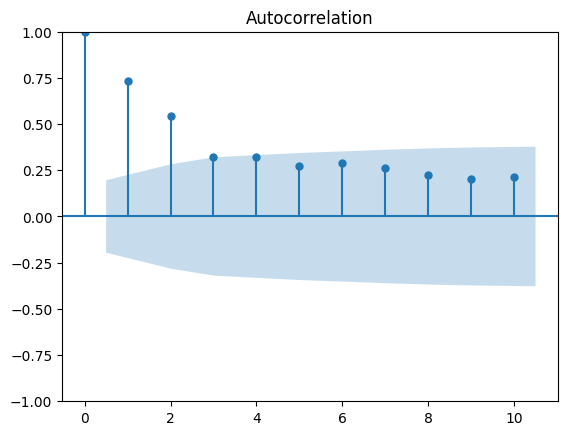

In [ ]:
from statsmodels.tsa.stattools import acf

# calcolo dei valori:

serie_pandas = df_red['open'].dropna()          # <-- su dataframe RIDOTTO!!

acf_values = acf(serie_pandas, nlags=10)
print(acf_values)

# visualizzazione
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(serie_pandas, lags=10)
plt.show()



**Come interpretare il plot ACF?**

- Asse x = lag (cioè il numero di passi temporali di ritardo)
- Asse y = coefficiente di autocorrelazione (da -1 a 1)
- Le barre blu = valore dell'autocorrelazione a ciascun lag
- Le linee tratteggiate = intervalli di confidenza al 95% (circa ±1.96/√N)

**Cosa mostra il grafico?**
- L'autocorrelazione ai vari lag è molto vicina a 1
- Tutte le barre sono fuori dall’intervallo di confidenza
- La serie sembra fortemente autocorrelata

**Interpretazione**<br>
Questo comportamento è tipico di una serie non stazionaria (cioè i valori futuri sono fortemente dipendenti da quelli passati):

**C’è autocorrelazione?**<br>
Sì, e molto forte, probabilmente persistente e significativa.

Potenziale problema:<br>
Una ACF così piatta e alta indica che la serie potrebbe avere:
- una tendenza (trend),
- stazionarietà assente → un prerequisito per molti modelli ARIMA.

Calcolo dell’autocorrelazione a un certo lag:

In [ ]:
# lag = 1
autocorr_lag1 = df['open'].autocorr(lag=1)
print(f"Autocorrelazione a lag 1: {autocorr_lag1:.3f}")

Autocorrelazione a lag 1: 1.000


In [ ]:
# più lag
for lag in range(1, 11):
    print(f"Lag {lag}: {df['open'].autocorr(lag=lag):.3f}")


Lag 1: 1.000
Lag 2: 1.000
Lag 3: 1.000
Lag 4: 1.000
Lag 5: 1.000
Lag 6: 1.000
Lag 7: 0.999
Lag 8: 0.999
Lag 9: 0.999
Lag 10: 0.999


## Plot grafici
Come visto nella sezione iniziale, è meglio misurare il tempo di esecuzione delle celle di plotting manualmente con `time.time` anzichè `%time`.

Tuttavia, come detto sopra, i plot grafici - sia di `matplotlib` che di `pandas.plot` - sono **lazily evaluated**. Anche con `time.time()`**il tempo misurato NON include tutta la lazy evaluation**, specialmente quella che avviene:
- dopo il ritorno della cella (es. il rendering effettivo dell'immagine nel frontend del browser)
- oppure nel backend grafico di `matplotlib`, che può differire tra ambienti (Agg, TkAgg, inline, etc.)

Tempo totale (incluso rendering): 4.30 secondi


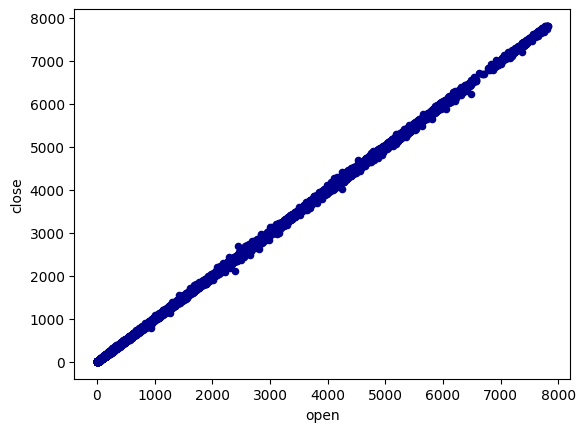

In [ ]:
import time
start = time.time()

df.plot.scatter(x='open', y='close',c='DarkBlue')  # tempo utente totale (con T4-GPU e RAM elevata): 100 secondi

end = time.time()
print(f"Tempo totale (incluso rendering): {end - start:.2f} secondi")


**L'istogramma**

In [ ]:
df['open'].hist(bins=50)   # immediato

Vogliamo limitare i valori dell'asse X al range [0,1000]

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['open'], bins=200)

# Set the x-axis limits
plt.xlim(0, 1000)

# Show the plot
plt.show()

Vediamo ora un altro plot molto importante: il [**boxplot**](https://en.wikipedia.org/wiki/Box_plot), molto utile per analizzare la distribuzione dei valori delle singole variabili ed anche confrontare tra di loro le varie distribuzioni (se hanno la stessa unità di misura).

In [ ]:
%time
df['open'].plot.box()

La linea verde rappresenta la mediana (il quartile al 50%).<br>
Le due linee orizzontali della scatola (superiore ed inferiore) rappresentano il primo ed il terzo quartile.<br>
Le due linee orizzontali sopra/sotto la scatola (i "due baffi") rappresentano il minimo ed il massimo, oppure (a seconda del metodo e delle sue impostazioni) rappresentano +- IQRx1.5, dove IQR è l'interquartile range (cioè Q3-Q1) [vedi l'help del metodo  *boxplot*].<br><br>
Nella seguente figura le due semantiche più comune nei boxplot:<br>
Image('/content/boxplot.png').
Il metodo pandas usa la prima.

Il problema di questo boxplot è che ci sono **tantissimi outlier** con valori molto alti che schiacciano la scala verticale, rendendo quasi invisibili i quartili (box e whisker). Ecco alcune strategie per rendere il boxplot più leggibile:

1. Restringere l’asse Y per escludere gli outlier estremi e vedere meglio i quartili centrali:

In [ ]:
%time
import matplotlib.pyplot as plt
df[['open', 'close']].plot.box()
plt.ylim(0, 500)  # Adatta il limite in base ai tuoi dati

2. Si può filtrare il dataframe per escludere i valori troppo estremi (es. oltre il 99° percentile):

In [ ]:
%time q_low = df[['open', 'close']].quantile(0.01)
q_high = df[['open', 'close']].quantile(0.99)
filtered_df = df[(df['open'] >= q_low['open']) & (df['open'] <= q_high['open']) &
                 (df['close'] >= q_low['close']) & (df['close'] <= q_high['close'])]

filtered_df[['open', 'close']].plot.box()

3. Usare `showfliers=False`.<br>
This is the key argument here. It tells the box plot not to display the individual data points that are considered outliers (those outside the whiskers).

In [ ]:
df[['open', 'close']].plot.box(showfliers=False)

4. Boxplot logaritmico (se i valori variano molto) - vedi assistente AI per la spiegazione della funzione `np.log1p`

In [ ]:
import numpy as np
np.log1p(df[['open', 'close']]).plot.box()

Se le **scale** delle colonne NON sono molto differenti - ad esempio: unità, decine, migliaia, ecc - il box-plot comparato (cioè su tutto il dataframe) può essere è utile, come si vede nella cella seguente:

In [ ]:
df[['open','close']].plot.box()

Il metodo `plot.box` della classe DataFrame (usato nella cella precedente) si può considerare anche come **alternativa grafica** al metodo `describe`, che produce informazioni simili (in formato tabellare).

**Diagramma a linea**<br>
Servono alcune operazioni preliminari:
- conversione della colonna `datetime`
- creare l'indice su datetime  (l'asse delle X)
- ordinare la colonna datetime
- filtrare per titolo

In [ ]:
# Converto in datetime (nuova colonna) e imposto l'indice
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.sort_index()

# Filtra ad esempio solo un titolo (Apple)
df_aapl = df[df['ticker'] == 'AAPL']


In [ ]:
df_aapl.head()

A questo punto possiamo fare il plot:

In [ ]:
df_aapl['close'].plot(title='Prezzo di Chiusura AAPL nel Tempo', figsize=(12, 5))

Miglioramenti grafici: serve il package `matplotlib`, che ha una sua sintassi.<br>
I metodi pandas per il plot NON sono più sufficienti.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_aapl.index, df_aapl['close'], label='AAPL Close', linewidth=1)
plt.title("Andamento Prezzo AAPL")
plt.xlabel("Data")
plt.ylabel("Prezzo di Chiusura ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Per plottare più ticker: Apple e Amazon

In [ ]:
tickers = ['AAPL', 'AMZN']
for ticker in tickers:
    df[df['ticker'] == ticker]['close'].plot(label=ticker, figsize=(12,5))

plt.legend()
plt.title("Prezzi di chiusura nel tempo")
plt.show()


## Dataframe vs serie
Attenzione all'uso delle [] per il subsetting di colonna:
- [] --> una serie pandas
- [[]] --> un dataframe pandas
perchè i metodi disponibili sono differenti.

In [ ]:
display(type(df['open']))
display(type(df[['open']]))

## Controllo unicità valori

Come verificare se una colonna contiene solo valori unici? In due modi:
- usare il metodo `unique`, e poi verificare con la funzione `len` quanti sono
- creare un indice con l'argomento `verify_integrity` impostato a `True`.

In [ ]:
# il primo modo:
len(df['open'].unique())

In [ ]:
# il secondo modo:
df.set_index('open')   # --> ovviamente dà errore, perchèper definizione l'indice deve contenere valori univoci

## Gli indici
Servono a [questo](https://stackoverflow.com/questions/27238066/what-is-the-point-of-indexing-in-pandas).<br>
In breve, l'indice *pandas* velocizza gli accessi. Dipende dall'uso che intendiamo fare del dataframe:
* se gli accessi sono del tipo: dammi la prime k righe, dammi le righe tra k1 e k2, dammi la riga k1, ecc --> l'indice di default sul progressivo numerico è il più indicato
* con riferimento al [dataset iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), se invece gli accessi prevalenti sono del tipo: dammi le righe per le quali *sepal length* = k1, oppure *sepal length* tra k1 e k2, ecc --> l'indice più consigliato è sulla colonna *sepal length*.

Nelle **serie temporali** usare un indice su una colonna `datetime` in un DataFrame (come in Pandas o cuDF) serve per ottimizzare e semplificare diverse operazioni legate al tempo, soprattutto se stai lavorando con serie temporali.

Abbiamo già utilizzato questo indice per il plot a linea. Perciò facciamo una reset iniziale:

In [ ]:
df.reset_index(inplace=True)  # senza l'argomento 'inplace' il reset index vale solo per l'output della cella,
                              # ma non persistente nell'oggetto.

In [ ]:
df.index # --> mostra l'indice attuale, per default è l'indice numerico creato automaticamente da pandas (la prima colonna in neretto nel display di prima,
         #     la CHIAVE di accesso)
         #     attenzione: un df pandas NON è una tabella relazionale con chiavi primarie, secondarie ed esterne; singole e composte.

In [ ]:
# set_index() --> Utile quando si vuole sostituire all'indice numerico progressivo (la chiave), automaticamente creato
# da 'pandas' (la prima colonna), un altro indice su una altra colonna.

df.set_index('datetime',inplace=True)           # necessario 'inplace=True'
df.head()

A cosa serve un indice su datetime?<br>
- Facilita l'accesso temporale
- Facilita il plot a linee
- Puoi fare slicing temporale (estrarre un periodo) in modo più semplice e veloce:

In [ ]:
df['1999-11-18 17:00:00':'1999-11-18 19:00:00']  # Funziona solo se datetime è l'indice

In [ ]:
df.reset_index(inplace=True)  # senza l'argomento 'inplace' il reset index vale solo per l'output della cella,
                              # ma non persistente nell'oggetto.
df.head()

Per **indici multipli** c'è la funzione di pandas [`MultiIndex`](https://stackoverflow.com/questions/44442831/create-multiindex-from-existing-dataframe) - vedi la risposta più votata.

## Analisi valori mancanti

Il metodo `df.isnull` restituisce una matrice booleana (True/False), delle stesse dimensioni del dataframe, nella quale ogni cella è il risultato (True o False) del test null.

Cioè, se qualche cella NON è valorizzata, cioè è NULL, il test per quella cella restituisce True.

Nei computer e nei linguaggi di programmazione True è rappresentato come 1 e False come 0.

Dunque la somma della matrice booleana dei test fornisce esattamente il numero di null della matrice.

In [ ]:
# Verifica valori mancanti per ciascuna colonna
missing_values = df.isnull().sum()
display(missing_values)

# Stampa solo le colonne che hanno almeno un valore mancante
print(missing_values[missing_values > 0])

## Analisi delle singole colonne

**La trasformazione dei dati**

Prima di fare TSA / TSF il dataframe della serie (nel nostro caso `Amtrak_df`) deve essere **trasformato** in tre modi:
- la <u>conversione della data</u> (l'elemento chiave) da stringa (un *object* in pandas), che NON è facilmente manipolabile, a *datetime64* (un altro tipo dato in pandas) con formato che invece è **manipolabile**. In realtà, qui AGGIUNGIAMO una nuova colonna di tipo *datetime*, mantenendo la vecchia.
- la creazione di un <u>oggetto pandas di tipo *Series*</u> con la nuova colonna come indice</u>
- la creazione di un <u>nuovo indice</u> **con frequenza inferita**

Vediamo la **prima** trasformazione.

## Individuazione degli outlier

### Metodo dell'intervallo interquartile (IQR)

> Aggiungi citazione



In [ ]:
# Supponiamo che `df` sia il DataFrame
numeric_cols = ['open', 'high', 'low', 'close', 'volume']

# Calcolo outlier con IQR per ogni colonna
outliers_iqr = {}

# determinazione lower e upper bound
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1     # inter-quartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Indici dei valori outlier (l'operatore | è l'OR)
    outliers_iqr[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Esempio: mostra outlier nella colonna "volume"
print(outliers_iqr['volume'])


### Z-score (standardizzazione)
Cercare documentazione su Internet

In [ ]:
from scipy.stats import zscore

# Calcolo z-score per colonne numeriche
z_scores = df[numeric_cols].apply(zscore)

# Soglia per outlier (tipicamente > 3 o < -3)
outliers_zscore = (z_scores.abs() > 3)

# Righe che contengono almeno un outlier
outlier_rows = df[outliers_zscore.any(axis=1)]

print(outlier_rows)


### Boxplot
La cella seguente richiede circa 2 minuti di esecuzione per ogni boxplot. Non sembra esserci un guadagno significativo con `cudf.pandas`.

In [ ]:
%time
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot - {col}')
    plt.show()


**Quale metodo usare?**
- IQR: più robusto, non assume distribuzione normale.
- Z-score: utile se vuoi automatizzare con soglie fisse.
- Boxplot: ottimo per un primo sguardo visivo.

## Subsetting di riga?


E' possibile che con la versione gratuita di Colab non si riescano ad eseguire alcune delle analisi / query che faremo nelle prossime celle, a causa ad esempio di mancanza di RAM.

E' possibile allora usare solo i primi 18 milioni di righe del dataset.

Se vuoi elaborare l’intero dataset, puoi passare ad un account [Colab Pro](https://colab.research.google.com/signup)!


In [ ]:
df[1000:1050]

,datetime,open,high,low,close,volume,ticker
1000,2000-03-10 21:30:00,146.06,146.25,145.12,145.25,76700,A
1001,2000-03-10 22:00:00,145.13,145.51,143.50,144.00,86400,A
1002,2000-03-10 22:30:00,144.00,144.94,141.00,142.50,166300,A
1003,2000-03-13 16:30:00,130.06,134.51,130.06,133.88,389300,A
1004,2000-03-13 17:00:00,134.00,137.25,133.50,136.81,319500,A
1005,2000-03-13 17:30:00,136.50,138.94,135.12,135.56,151400,A
1006,2000-03-13 18:00:00,135.19,136.69,133.81,133.87,120300,A
1007,2000-03-13 18:30:00,133.88,136.88,133.75,136.88,78300,A
1008,2000-03-13 19:00:00,136.88,136.94,135.25,135.81,71700,A
1009,2000-03-13 19:30:00,135.81,136.88,135.18,136.12,75000,A


**Attenzione**: se avete problemi di prestazione in Jupyter Notebook (su PC senza scheda grafica) la cella seguente permette di estrarre un sottoinsieme della serie temporale. Scegliete un limite adeguato alla vostra situazione.

In [ ]:
# df = df.iloc[:18000000]    # il subsetting di riga si fa con il metodo iloc


Diamo ora un’occhiata alle statistiche numeriche riassuntive.

## Analisi raggruppate
Specifiche di questo dataset, sono *time consuming* e quindi rappresentano un bel test.

Per analizzare correttamente i dati, dobbiamo **raggrupparli per ticker**.


In [ ]:
%time df.groupby("ticker").agg({"datetime": ["min", "max", "count"]})

La cella precedente ha visualizzato 3 colonne aggiuntive.

Vediamo il suo funzionamento passo a passo.

E' una singola riga che esegue un'**aggregazione dei dati** utilizzando la libreria **pandas**.

Serve a **raggruppare i dati** nel DataFrame in base al simbolo dell’azione (`ticker`) e a calcolare alcune statistiche riassuntive sulla colonna `datetime` all’interno di ciascun gruppo.

Vediamo il significato di ciascun elemento della riga:

```python
%time df.groupby("ticker").agg({"datetime": ["min", "max", "count"]})
```
- `%time`:<br>
è un **"magic command"** di Jupyter Notebook.
Non fa parte del linguaggio Python vero e proprio, ma è un’istruzione speciale per l’ambiente notebook.
`%time` misura il **tempo di esecuzione** della riga di codice successiva. Utile per capire quanto tempo impiega un’operazione, soprattutto con dataset grandi.
- `df`:<br>
è il nome del **DataFrame pandas**, creato in precedenza nel notebook, leggendo il file `usa_stocks_30m.parquet`.
- `.groupby("ticker")`:<br>
è un metodo pandas che **raggruppa le righe** del DataFrame in base ai valori univoci della colonna `ticker`.
Quindi tutte le righe relative allo stesso titolo azionario (es. 'GOOG', 'AAPL', ecc.) verranno trattate insieme.
- `.agg({"datetime": ["min", "max", "count"]})`:
è un metodo pandas che esegue **aggregazioni** sui dati raggruppati. Nel dettaglio:
  * `"datetime"` è la colonna su cui si vuole fare l’analisi.
  * `["min", "max", "count"]` sono le **funzioni di aggregazione** da applicare:

| Funzione  | Cosa calcola                                             |
| --------- | -------------------------------------------------------- |
| `"min"`   | La **prima data/ora** registrata per ciascun titolo      |
| `"max"`   | L’**ultima data/ora** registrata                         |
| `"count"` | Il **numero di righe** (osservazioni) per ciascun titolo |

In sintesi, questa riga di codice:
- raggruppa i dati per ciascun `ticker`
- calcola per ogni titolo: la data iniziale, la data finale, e il numero totale di record
- mostra quanto tempo impiega a completare questa aggregazione grazie a `%time`

Ora calcoliamo i prezzi di chiusura minimi e massimi di ogni ticker su base settimanale:

In [ ]:
%%time
df[["year", "week", "day"]] = df.datetime.dt.isocalendar()
df.groupby(["ticker", "year", "week"]).agg({"close": ["min", "max"]})

Esaminiamo la **prima linea** di codice della cella precedente, elemento per elemento:

```python
df[["year", "week", "day"]] = df.datetime.dt.isocalendar()
```
Questa riga estrae informazioni dalla colonna `datetime` del dataFrame `df`, ricavando l’anno, il numero della settimana e il giorno della settimana, e crea **tre nuove colonne** nel dataFrame per ciascuna di queste componenti.

`df.datetime`: accede alla colonna `datetime` del dataframe `df`.

`.dt`: è un accessor che consente di accedere alle proprietà temporali di una Series pandas contenente date.

`.isocalendar()`: restituisce un dataframe con tre colonne: `year`, `week`, e `day`, secondo **lo standard ISO 8601**.

In sintesi, la riga `df[["year", "week", "day"]] = ...`: assegna i valori ottenuti da `isocalendar()` a tre nuove colonne del dataframe chiamate `year`, `week` e `day`.

Vediamo ora il funzionamento, elemento per elemento, della **seconda riga** della cella:

```python
df.groupby(["ticker", "year", "week"]).agg({"close": ["min", "max"]})
```
Questa riga esegue un’aggregazione raggruppata del dataframe:

`df.groupby(["ticker", "year", "week"])`: raggruppa le righe del dataframe per <u>combinazioni uniche di ticker, anno e settimana</u>.
Questo significa che le operazioni successive saranno applicate indipendentemente a ciascun gruppo (cioè a ciascun titolo azionario per ogni settimana di ogni anno).

`.agg(...)`: applica delle funzioni di aggregazione ai dati raggruppati.

`{"close": ["min", "max"]}`: specifica la colonna da aggregare (*close*) e le funzioni da applicare:

`"min"`: calcola il valore minimo della colonna *close* per ogni gruppo.

`"max"`: calcola il valore massimo della colonna *close* per ogni gruppo.

**In sintesi**, questa cella di codice fa tre cose:
- aggiunge al dataframe tre colonne: anno, settimana, giorno (`year`, `week`, `day`)
- raggruppa i dati in base a `ticker`, `year` e `week` (**aggregazione su base settimanale**)
- calcola il prezzo di chiusura minimo e massimo (*close*) per ciascun gruppo

L'esecuzione non è stata veloce, ma accettabile.

Cioè, **possiamo aggregare i dati di questo dataframe a livello settimanale <u>con pandas standard senza particolare problemi</u>**.

Ma cosa succede se vogliamo fare analisi più complesse?

Supponiamo di voler calcolare la **media mobile giornaliera** di tutti questi valori per ciascun titolo azionario. Cioè, vogliamo esaminare come la media mobile del giorno varia per ogni intervallo di 30 minuti.

In questo specifico dataset dimostrativo, abbiamo infatti esattamente **una riga ogni 30 minuti**, quindi possiamo usare una <u>finestra fissa di 12 intervalli</u> (dato che ci sono 12 intervalli per ogni giornata di mercato).

Ma nella pratica, i dati reali sono spesso **disordinati**, cioè con frequenze temporali <u>irregolari</u> — senza contare i dati **mancanti** o **duplicati**.

Usare finestre fisse basate sul numero di righe può **falsare l’analisi**.

Per fortuna, risolvere questo problema con pandas è in realtà piuttosto semplice: possiamo usare **una finestra temporale fissa per ogni ticker**, invece di un numero fisso di righe.

Sfortunatamente, senza `cudf` è abbastanza lento, come si vede dalla cella seguente (circa 40 secondi).

In [ ]:
%time result = df.set_index("datetime").sort_index().groupby("ticker").rolling("1D").mean().reset_index()
result.head()

Cosa ha fatto la cella precedente? Ha calcolato la media mobile giornaliera dei prezzi azionari per ciascun singolo titolo (`ticker`). Vediamola passo a passo.

`df`: si riferisce al dataframe di pandas che è stato caricato in precedenza nel notebook con il file `usa_stocks_30m.parquet`.

`.set_index("datetime")`: questo metodo cambia l’indice del dataarame. L’indice originale (una sequenza numerica automatica per ogni riga) è qui sostituito con i valori della colonna "datetime".
**Impostare la colonna `datetime` come indice è fondamentale per eseguire operazioni basate sul tempo**, come ad esempio il calcolo di una media mobile su una finestra temporale.

`.sort_index()`: dDopo aver impostato "datetime" come indice, questo metodo ordina le righe del DataFrame in base al nuovo indice (cioè i valori temporali).
**Ordinare per tempo è necessario prima di applicare un calcolo "rolling"**, per assicurarsi che la finestra mobile processi i dati nell’ordine cronologico corretto.

`.groupby("ticker")`: questo metodo raggruppa le righe del dataframe in base ai valori univoci nella colonna "ticker". Ciò significa che le operazioni successive verranno **applicate indipendentemente a ciascun titolo azionario** (es. 'GOOG', 'AAPL', ecc.).
La media mobile sarà quindi calcolata **separatamente per ogni azione**.

`.rolling("1D")`: è **il cuore del calcolo "rolling" (finestra mobile)**. Crea un oggetto di finestra mobile temporale. "1D" specifica la dimensione della finestra: in questo caso una giornata (1 Day). Per ogni riga del dataframe, il calcolo rolling considera i dati presenti nelle 24 ore precedenti quel *datetime*. Usare una finestra temporale come "1D", come detto prima, è spesso più affidabile rispetto a una finestra basata su un numero fisso di righe, soprattutto se i dati hanno frequenze irregolari o mancano osservazioni.

`.mean()`: è la funzione di aggregazione applicata alla finestra mobile. Per ogni finestra di un giorno (per ciascun titolo azionario), calcola la media dei valori numerici contenuti in quella finestra.
Quando usato dopo `groupby` e `rolling` su un dataframe indicizzato per tempo, `.mean()` calcola la media di tutte le colonne numeriche presenti nella finestra, per ciascun gruppo (`ticker`).
In questo contesto, calcola la media mobile giornaliera delle colonne legate ai prezzi.

`.reset_index()`: dopo il calcolo della media mobile, il dataframe risultante ha un **indice multilivello** (composto da "ticker" e "datetime"). Questo metodo trasforma nuovamente l’indice in colonne normali, rendendo il dataframe più facile da usare per analisi successive o per visualizzazioni.

`result = ...`: l’intera catena di operazioni (il dataframe con la media mobile giornaliera calcolata per ciascun ticker) è assegnata a una nuova variabile chiamata `result`.










Circa **40 secondi solo per una singola query**. Non è proprio l’ideale, soprattutto considerando quello che faremo tra poco.

Ora che abbiamo calcolato il prezzo medio giornaliero, ripetiamo l’operazione per ottenere le medie mobili semplici (SMA), comunemente usate nell’analisi dei titoli azionari.

Inizieremo con la SMA a 50 giorni, e poi calcoleremo la SMA a **200 giorni**.


In [ ]:
%time fiftyDay = df.set_index("datetime").sort_index().groupby("ticker").rolling("50D").mean().reset_index()   # 37 secondi senza cudf
fiftyDay.head()

In [ ]:
%time twoHunDay = df.set_index("datetime").sort_index().groupby("ticker").rolling("200D").mean().reset_index()  # 38 secondi senza cudf
twoHunDay.head()

## Query per fascia

Per filtrare il dataframe da 36 milioni di righe in base a:
- una lista di ticker (es. ['AAPL', 'GOOG', 'MSFT']),
- una **fascia oraria** (es. dalle 09:00 alle 11:00),
- un intervallo di date (es. 2023-01-01 a 2023-01-31),

si può fare in questo modo:

In [ ]:
# cudf: 50" (T4-GPU e RAM elevata)
# pandas: 50" (T4-GPU e RAM elevata)
# pandas: 44" (V2-8 tpu)

import time
start = time.time()

# Assicuriamoci che 'datetime' sia in formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Parametri
lista_ticker = ['A', 'GOOG', 'MSFT']
data_inizio = '1999-11-18'
data_fine = '1999-11-30'
ora_inizio = '09:00:00'
ora_fine = '11:00:00'

# Filtri
df_filtrato = df[
    df['ticker'].isin(lista_ticker) &
    (df['datetime'].dt.date >= pd.to_datetime(data_inizio).date()) &
    (df['datetime'].dt.date <= pd.to_datetime(data_fine).date()) &
    (df['datetime'].dt.time >= pd.to_datetime(ora_inizio).time()) &
    (df['datetime'].dt.time <= pd.to_datetime(ora_fine).time())
]

end = time.time()
print(f"Tempo totale (incluso rendering): {end - start:.2f} secondi")

## Standardizzazione
**La standardizzazione serve per trasformare i dati in modo che abbiano media = 0 e deviazione standard = 1.**

Perché standardizzare in una serie temporale?<br>

1. Per confrontare serie diverse<br>
Se hai più serie con scale diverse (es. prezzo di azioni Apple vs Amazon), standardizzare ti permette di confrontarle:

```python
df['AAPL_z'] = (df['AAPL'] - df['AAPL'].mean()) / df['AAPL'].std()
df['AMZN_z'] = (df['AMZN'] - df['AMZN'].mean()) / df['AMZN'].std()
```

Così puoi fare un grafico delle due serie sulla stessa scala.

2. Per migliorare performance di modelli ML<br>
Se stai usando la serie temporale per:
- forecasting con regressori
- clustering di serie
- modelli supervisionati

…allora la standardizzazione migliora spesso le performance, perché molti modelli (es. regressione lineare, k-means, RNN) presuppongono variabili su scale simili.

3. Per costruire indicatori statistici (es. z-score)<br>
Esempio:

```python
rolling_mean = df['close'].rolling(window=20).mean()
rolling_std = df['close'].rolling(window=20).std()
df['z_score'] = (df['close'] - rolling_mean) / rolling_std
```

Questo z-score mobile ti aiuta a:
- individuare outlier temporanei
- costruire strategie di mean reversion (es. in finanza)

**Quando non serve standardizzare?**<br>
- se vuoi solo visualizzare il trend assoluto nel tempo
- se la scala ha significato reale (es. fatturato in € o temperatura in °C)
- se usi modelli tree-based (come Random Forest o XGBoost), che non sono sensibili alla scala



**Esempio  (su Colab o Jupyter)**

In [ ]:
df['close_std'] = (df['close'] - df['close'].mean()) / df['close'].std()
df['close_std'].plot()


Oppure, meglio, con la funzione `preprocessing.scale`: - LENTA

In [ ]:
from sklearn.preprocessing import scale

# Esempio semplice
df = pd.read_parquet("usa_stocks_30m.parquet")
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.sort_index()  # molto importante!

# Applichiamo la standardizzazione alla colonna "close"
df['close_scaled'] = scale(df['close'])
df['close_scaled'].plot()

Perché usare `pd.to_datetime()` su una colonna?<br>
- Per convertire la colonna in oggetti datetime reali
- Quando carichi un DataFrame da CSV, Parquet, Excel ecc., la colonna datetime spesso è letta come *stringa (object)*, o peggio, intero/float (timestamp numerico).<br>
Quindi Pandas non sa che quella colonna rappresenta una data.

# Analisi con cuDF Pandas

**Iniziamo ora a lavorare con `cudf`.<br>
`cudf` è una versione di pandas con accelerazione CUDA.**

## Post e video

Vedi [questo post con video](https://www.linkedin.com/feed/update/urn:li:activity:7173982894921519105?utm_source=share&utm_medium=member_desktop) e [questo articolo](https://www.blog.dailydoseofds.com/p/nvidias-latest-update-can-make-your).

---

Qui sotto il contenuto del precedente post di Avi Chawla:

**pandas con GPU**<br>
*Steve NouriSteve Nouri*<br>
**NVIDIA made Pandas 50x faster with No code change!**<br>

Just do this:<br>
%load_ext cudf.pandas<br>
import pandas as pd<br>

It is now integrated directly in Google Colab, but you need to enable a GPU runtime.

Give it a try it here https://bit.ly/3XX9pgm.

---

Vedi anche [questo ottimo video](https://www.youtube.com/watch?v=8X_IaCNpo7E) tradotto in italiano.

---


## Scheda riassuntiva

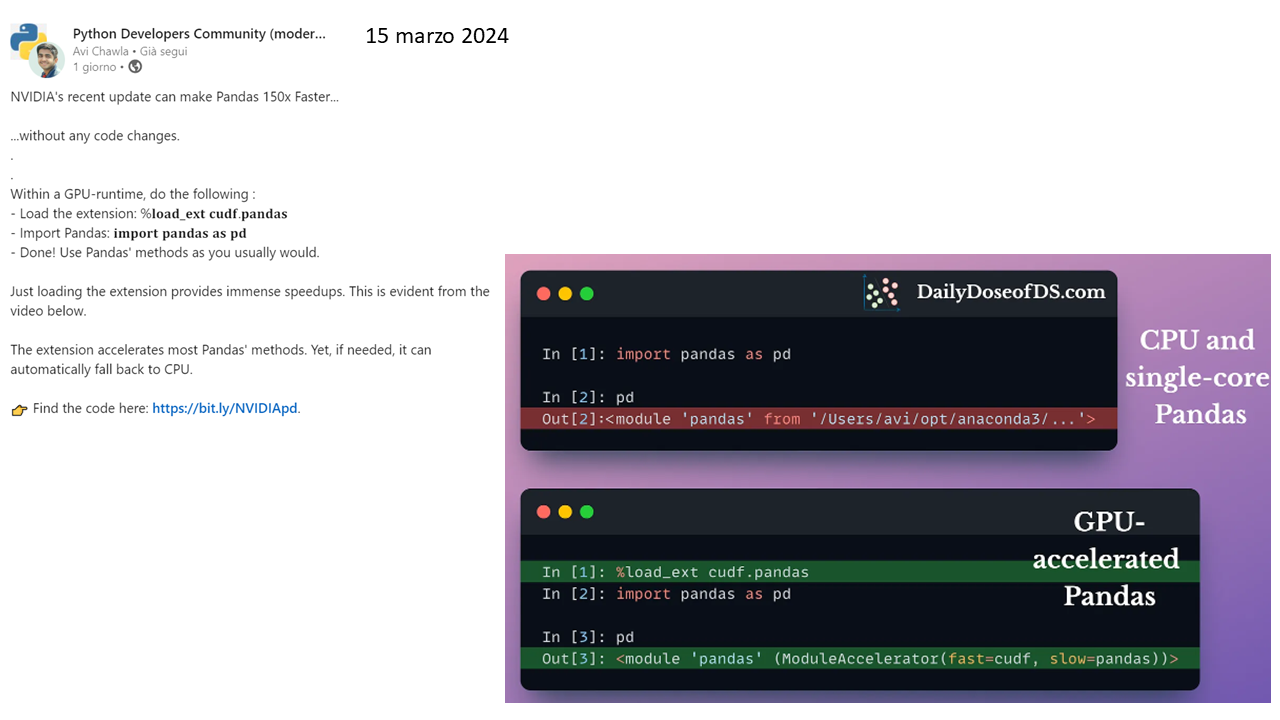

In [ ]:
Image('pandas_with_GPU.png') if IN_COLAB else display(Image(filename='pandas_with_GPU.png'))

## Attivazione di `cudf`
---
> Si deve caricare l'estensione `cudf.pandas` come primo passo del notebook, prima di importare qualsiasi modulo.
> Qui riavviamo esplicitamente il kernel per simulare questo comportamento.

---

In [ ]:
get_ipython().kernel.do_shutdown(restart=True)

In [ ]:
%load_ext cudf.pandas
import pandas as pd

## Analisi

<span style="background-color:yellow; font-weight:bold;">📌 Eseguiamo lo stesso codice di prima per capire il vantaggio della accelerazione GPU nei notebook con pandas.</span>

In [ ]:
%time df = pd.read_parquet("usa_stocks_30m.parquet")
df.info()

In [ ]:
df.head()

Diamo un’occhiata alle statistiche descrittive più dettagliate per i dati numerici, proprio come abbiamo fatto in precedenza.

In [ ]:
# df = df.iloc[:18000000]
# df.shape

In [ ]:
%time df.describe()

Prima di tutto, possiamo notare che i risultati sono identici, anche se ora stiamo usando la GPU. Ottimo.

In secondo luogo, l’operazione è stata molto più veloce, nonostante un leggero overhead dovuto al fatto che questa è stata la prima elaborazione accelerata su GPU sui dati.

Adesso passiamo alle aggregazioni con `groupby`.

In [ ]:
%time df.groupby("ticker").agg({"datetime": ["min", "max", "count"]})

In [ ]:
%%time
df[["year", "week", "day"]] = df.datetime.dt.isocalendar()
df.groupby(["ticker", "year", "week"]).agg({"close": ["min", "max"]})

20-50x più veloce con lo stesso codice!

Procediamo con l’operazione `groupby` seguita da `rolling`, che è notoriamente piuttosto pesante e lunga da eseguire.

Con l'accelerazione GPU, vedremo quanto migliora il tempo di esecuzione rispetto alla versione CPU.


In [ ]:
%time result = df.set_index("datetime").sort_index().groupby("ticker").rolling("1D").mean().reset_index()
result.head()

Fantastico! Da oltre 25 secondi a meno di 2 secondi: un bel salto in avanti!

Ora concludiamo il calcolo delle SMA (Simple Moving Averages).

Nel frattempo, facciamo anche un profiling dell’attività per vedere come vengono usate CPU e GPU.



In [ ]:
%time fiftyDay = df.set_index("datetime").sort_index().groupby("ticker").rolling("50D").mean().reset_index()
fiftyDay.head()

In [ ]:
%time twoHunDay = df.set_index("datetime").sort_index().groupby("ticker").rolling("200D").mean().reset_index()
twoHunDay.head()

Fantastico, `cudf.pandas` ha completato lo stesso workflow in circa 10 secondi!

È anche importante capire che questa differenza di velocità **cresce man mano che aumenti il numero di celle e la complessità dell’elaborazione**.

Ad esempio, calcolare una SMA a 200 giorni su tutte le 36 milioni di celle richiederà meno di 12 secondi su una GPU T4 con cuDF.pandas, contro oltre un minuto con la CPU.

**In breve: più grande è il dataset e più complessa è l'operazione, più si sente la differenza tra pandas e cudf.pandas**.

In [ ]:
result = result.join(fiftyDay, rsuffix='_50')
result = result.join(twoHunDay, rsuffix='_200')

In [ ]:
result.head()

## Usare librerie di terze parti con `cudf.pandas`

Finora abbiamo usato solo pandas, e tutto ha funzionato senza intoppi.

Ma spesso i workflow reali coinvolgono **più librerie**, molte delle quali sono progettate per accettare oggetti pandas.
La buona notizia? Anche in questi casi, `cudf.pandas` è perfettamente compatibile.

Quando usi `cudf.pandas`, si possono passare oggetti pandas anche a librerie di terze parti, esattamente come si farebbe con pandas tradizionale.

Ad esempio, possiamo passare il dataset a `plotnine` per visualizzare la media annuale del prezzo di chiusura del titolo GOOG.

In [ ]:
goog_closing_value = result.loc[result.ticker == "GOOG"]
goog_closing_value.head()

In [ ]:
goog_closing_value_p9 = goog_closing_value.melt(
    id_vars="datetime",
    value_vars=["close"],
    var_name="SMA",
    value_name="price"
).dropna()

goog_closing_value_p9.head()

Perfetto! Ora possiamo usare `plotnine` per analizzare visivamente l’andamento del titolo e confrontarlo con le medie mobili a 50 e 200 giorni.

In [ ]:
from plotnine import *

In [ ]:
# Gallery, lines
(
    ggplot(goog_closing_value_p9, aes(x="datetime", y="price", color="SMA"))
    + geom_line()
    # Styling
    + scale_x_datetime(date_breaks="1 year", date_labels="%Y")
    + theme_538()
)

# Installazione di `cudf` in Windows 10

L'**installazione di `cudf`** in Windows 10/11 non è semplice, occorre fare così:

To install cuDF on Windows 10, you need to use the Windows Subsystem for Linux (WSL) with an Ubuntu distribution and install the RAPIDS libraries within that environment. This involves enabling WSL, installing Ubuntu, setting up the CUDA environment, and then using pip or conda to install cuDF.
Here's a step-by-step breakdown:
1. Enable WSL and Install Ubuntu:
Enable WSL: Open PowerShell as an administrator and run wsl --install.
Install Ubuntu: Download Ubuntu from the Microsoft Store.
Verify WSL Version: Use wsl --list --verbose in PowerShell to confirm WSL2 is active.
2. Install CUDA Toolkit and Drivers:
Install NVIDIA Drivers: Download the appropriate driver for your NVIDIA GPU from NVIDIA's website.
Install CUDA Toolkit: Follow the instructions on the NVIDIA website to install the CUDA Toolkit within your Ubuntu WSL environment.
Verify GPU and Driver: Open Ubuntu and run nvidia-smi to check if your GPU and driver are correctly detected.
3. Install Miniconda:
Download Miniconda: Download the Miniconda installer for Linux from the official Miniconda website.
Install Miniconda: Follow the installation instructions provided with the installer within your Ubuntu WSL environment.
Verify Miniconda: Run conda --version to confirm Miniconda is installed.
4. Install cuDF:
Create a Conda Environment:
Create a new conda environment with conda create -n rapids-環境 python=3.9 (replace 3.9 with your desired Python version).
Activate the Environment:
Activate the environment using conda activate rapids-environment.
Install cuDF:
Use pip to install cuDF, specifying the correct CUDA version (e.g., pip install cudf-cu12 for CUDA 12).
Verify cuDF Installation:
You can verify the installation by importing cuDF in a Python script or Jupyter Notebook using import cudf.
5. Install JupyterLab (Optional):
Install JupyterLab: Use conda install -c conda-forge jupyterlab within your activated conda environment.
Launch JupyterLab: Start JupyterLab with jupyter lab.
By following these steps, you can successfully set up cuDF on your Windows 10 machine using WSL2 and leverage its GPU-accelerated data processing capabilities.

# Conclusioni

Con `cudf.pandas`, si può continuare a usare pandas come libreria principale per i DataFrame, mantenendo tutta la familiarità dell’API ma con prestazioni molto più elevate.

👉 Quando l’elaborazione comincia a rallentare, basta caricare `cudf.pandas` e rieseguire il codice esistente sulla GPU: più veloce, senza dover riscrivere nulla!

🔗 Per approfondire cudf.pandas, visita:
👉 https://rapids.ai/cudf-pandas

# Serie temporali *big*: analisi e regressione

Con 30 milioni di righe siamo fuori dalla portata di molti strumenti "standard" (tipo *pandas* puro o *scikit-learn* senza accorgimenti). Però con gli strumenti giusti in Python si può lavorare efficientemente anche su big data per analisi storiche e previsioni future.

## Lo slicing
La prima possibilità è lo slicing del dataframe pandas, fattibile in vari modi.<br>
Occorre impostare bene il `DatetimeIndex`. Vediamo degli esempi (da adattare ii dataset di questo notebook).

0) Preparazione fondamentale

In [ ]:
import pandas as pd

# Se hai una colonna 'date' -> DatetimeIndex ordinato
df = pd.read_parquet("data.parquet")  # meglio di CSV per tempi/memoria
df['date'] = pd.to_datetime(df['date'], utc=False)   # evita timezone se non ti serve
df = df.set_index('date').sort_index()               # indice monotonicamente crescente


1) Range by date (il classico, veloce)

In [ ]:
# anno 1970
df_1970 = df.loc['1970']

# dal 1 gen 1970 al 31 dic 1970 (inclusi)
df_1970_full = df.loc['1970-01-01':'1970-12-31']

# finestra precisa
df_win = df.loc['1970-03-15 08:00':'1970-03-20 18:00']


2) Slicing senza costruire subito il DataFrame (CSV enorme)<br>
Se il file è enorme e serve solo un periodo:
- se si conoscono le righe, usare `skiprows/nrows` (due argomenti della funzione *pandas* `pd.read_csv()`.
- altrimenti, leggere a chunk e filtrare.

In [ ]:
import pandas as pd

start = '1970-01-01'
end   = '1970-12-31'

it = pd.read_csv(
    "data.csv",
    parse_dates=['date'],
    chunksize=1_000_000,
    dtype={'col1':'float32', 'col2':'float32'}  # downcast!
)

parts = []
for chunk in it:
    mask = (chunk['date'] >= start) & (chunk['date'] <= end)
    if mask.any():
        parts.append(chunk.loc[mask])

df_1970 = pd.concat(parts, ignore_index=True)


3) Ultra-rapido con slice_indexer (evita parsing 2 volte)

In [ ]:
start, end = '1970-01-01', '1970-12-31'
idxer = df.index.slice_indexer(start, end)  # calcola le posizioni
df_1970 = df.iloc[idxer]


4) Se l’indice è posizionale (no datetime)<br>
Pre-calcola i limiti con `searchsorted` sull’array dell’indice `datetime` esterno:

In [ ]:
ts = df.index.values  # numpy datetime64[ns]
i0 = ts.searchsorted(np.datetime64('1970-01-01'))
i1 = ts.searchsorted(np.datetime64('1970-12-31T23:59:59.999999999'), 'right')
df_1970 = df.iloc[i0:i1]


5) Slicing per orario del giorno (serie intraday)

In [ ]:
# solo orario d’ufficio su tutte le date:
df_office = df.between_time('09:00', '18:00')

# un orario specifico su tutte le date:
df_at_9 = df.at_time('09:00')


6) Slicing per mese/anno con `Grouper`

In [ ]:
# tutti i gennaio (di tutti gli anni):
df_january = df[df.index.month == 1]

# gruppi mensili (per poi iterare o aggregare)
for month, g in df.groupby(pd.Grouper(freq='M')):
    pass


7) Memoria & performance (trucchetti utili)
- Formato: *Parquet/Feather (pyarrow)* ≫ *CSV*.
- *Dtypes*: usare `float32`, `Int32`, `category` per stringhe a bassa cardinalità.
- No timezone se non serve (evitare conversioni costose).
- Evitare copie inutili: `view = df.loc['1970']` di solito è *slice-like*; se occorre modificarlo, `.copy()` esplicito.
- Filtri multipli: preferisci mask booleane in un solo passaggio:

In [ ]:
m = (df.index.year == 1970) & (df['train'])
df_sub = df.loc[m]


Query/numexpr: su 30M può aiutare con numerici:

In [ ]:
df_sub = df.query("value > 0.0 and other < 10", engine="numexpr")

8) Stima ordine di grandezza<br>
30M righe × (8–16 byte/valore) × (# colonne).<br>
Con 5 colonne float32/Int32 **~ 600–700 MB**; con float64 raddoppi. Se siete al limite RAM:
- leggere a chunk, filtrare, concatenare;
- oppure salvare uno store indicizzato per anno (partizionamento per directory year= in Parquet) e caricare  solo le partizioni necessarie.

## ALtri strumenti per Analisi Storiche (Time Series su Big Data)

Ecco alcune opzioni:

1. **Dask**<br>
Estende pandas a dataset che non entrano in memoria.<br>
    - Sintassi simile a pandas.
    - Supporta operazioni distribuite e parallele.
    - Perfetto per aggregazioni, rolling window, resampling, ecc.
```python
import dask.dataframe as dd
df = dd.read_csv("azioni.csv")
df.groupby('ticker').resample('1D').mean().compute()
```

2. **Vaex**<br>
Altro dataframe "out-of-core".
    - Estremamente veloce, anche su milioni di righe.
    - Ottimo per filtraggio, visualizzazione veloce e aggregazioni.

3. **Polars**<br>
Più recente, velocissimo, scritto in Rust.
    - Supporta lazy evaluation e parallelismo.
    - Alternativa moderna a pandas per grandi dataset.
```python
import polars as pl
df = pl.read_csv("azioni.csv")
df.groupby(["ticker", "giorno"]).agg(pl.col("prezzo").mean())
```
4. **DuckDB**<br>
Database in-process (come SQLite ma per analytics).
    - Si può usare come backend SQL su file CSV/Parquet senza caricarli in RAM.
```python
import duckdb
con = duckdb.connect()
con.execute("SELECT AVG(prezzo) FROM 'azioni.csv' GROUP BY ticker, giorno").fetchdf()
```

## Polars

![](polars2.png)

In [ ]:
from IPython.display import IFrame
IFrame("15 Pandas ↔ Polars ↔ SQL ↔ PySpark Translations.pdf", width=600, height=600)

Su `Polars` vedi anche [questo post Linkedin](https://www.linkedin.com/posts/davide-nardini_polars-pandas-python-activity-7264548457456050177-0t7f?utm_source=share&utm_medium=member_desktop) di Davide Nardini del dicembre 2024 ed anche [quest'altro](https://www.linkedin.com/posts/davide-nardini_polars-activity-7283394609773223936-OcqR?utm_source=share&utm_medium=member_desktop) di gennaio 2025.

## Strumenti per Previsioni (Forecasting)

**Modelli Classici** (se ci sono feature ingegnerizzate)<br>
scikit-learn + subsampling:
- Usare un subset rappresentativo (es. sampling per ticker o timeframe).
- Si possono fare regressioni, modelli ensemble, XGBoost, ecc.

**Modelli Specifici per Time Series**:<br>
Facebook Prophet (ora neuralprophet)
- Molto semplice da usare, anche su big dataset se raggruppi per entità.
- Gestisce stagionalità, ferie, trend.

**GluonTS / NeuralForecast / Darts**<br>
Librerie di deep learning per time series.
- Gestiscono milioni di righe, con modelli LSTM, N-BEATS, Transformer.
- Supportano multi-series forecasting.

**StatsForecast**
Versione ottimizzata di ARIMA/ETS/Theta per dataset multi-serie (es. tanti titoli azionari).
- Veloce, usa Numba.
```python
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
sf = StatsForecast(df, models=[AutoARIMA()], freq="D")
forecast = sf.forecast(h=7)
```

**Approccio più "end-to-end"**:<br>
PyCaret Time Series
- UI semplificata per esperimenti rapidi.
- Supporta sia modelli classici che deep learning.
- Supporta anche AutoML.

## cudf
**Pro di cudf per serie temporali**:<br>
- Sintassi molto simile a pandas, quindi il porting è facile.
- Performance spesso 10x–100x superiori a pandas, su dati che "stanno" nella memoria della GPU.
- Ottimo per aggregazioni, rolling windows, joins, resampling su time series.
- Integrato con dask_cudf per elaborazioni distribuite su più GPU.

**Limiti di cudf per serie temporali**:<br>
- I dati devono entrare nella memoria della GPU (VRAM), quindi ad esempio con una GPU da 8GB si può lavorare con ~10-15 milioni di righe in una volta.
- Non ha ancora tutte le funzionalità avanzate di pandas o polars.
- Non adatto su CPU-only: su una macchina senza GPU, è inutilizzabile.

**Esempio di analisi di serie storica con `cudf`**

In [ ]:
import cudf
from cudf.core.window import Rolling

In [ ]:


# Caricamento CSV (sulla GPU!)
df = cudf.read_csv("azioni.csv")

# Converti in datetime
df["data"] = cudf.to_datetime(df["data"])

# Resampling: media giornaliera
df.set_index("data", inplace=True)
df = df.sort_index()
df_agg = df.resample("1D").mean()

# Rolling window (es: media mobile 7 giorni)
df["media_mobile"] = df["prezzo"].rolling(window=7).mean()
